Esta es la práctica de Guillermo Barrio correspondiente al módulo de Data Mining.

La práctica se compone de este documento exclusivamente. Se han dividido las preguntas y respuestas en celdas markdown con los encabezamientos Px y Rx, respectivamente.

P1 - Vasmos a cargar el dataset de AirBnB descargado de [aquí](https://public.opendatasoft.com/explore/dataset/airbnb-listings/export/?disjunctive.host_verifications&disjunctive.amenities&disjunctive.features&q=Madrid&dataChart=eyJxdWVyaWVzIjpbeyJjaGFydHMiOlt7InR5cGUiOiJjb2x1bW4iLCJmdW5jIjoiQ09VTlQiLCJ5QXhpcyI6Imhvc3RfbGlzdGluZ3NfY291bnQiLCJzY2llbnRpZmljRGlzcGxheSI6dHJ1ZSwiY29sb3IiOiJyYW5nZS1jdXN0b20ifV0sInhBeGlzIjoiY2l0eSIsIm1heHBvaW50cyI6IiIsInRpbWVzY2FsZSI6IiIsInNvcnQiOiIiLCJzZXJpZXNCcmVha2Rvd24iOiJyb29tX3R5cGUiLCJjb25maWciOnsiZGF0YXNldCI6ImFpcmJuYi1saXN0aW5ncyIsIm9wdGlvbnMiOnsiZGlzanVuY3RpdmUuaG9zdF92ZXJpZmljYXRpb25zIjp0cnVlLCJkaXNqdW5jdGl2ZS5hbWVuaXRpZXMiOnRydWUsImRpc2p1bmN0aXZlLmZlYXR1cmVzIjp0cnVlfX19XSwidGltZXNjYWxlIjoiIiwiZGlzcGxheUxlZ2VuZCI6dHJ1ZSwiYWxpZ25Nb250aCI6dHJ1ZX0%3D&location=16,41.38377,2.15774&basemap=jawg.streets)

![](descargar.png)

R1 - Cargamos el dataset sin mayores problemas

In [241]:
airbnb<-read.csv('airbnb-listings.csv',sep = ';', stringsAsFactors = T)
options(repr.plot.height=4,repr.plot.width=6,repr.plot.res = 300)

P2 - Vamos a quedarnos con las columnas de mayor interés:

'City','Room.Type','Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Square.Feet','Guests.Included','Extra.People','Review.Scores.Rating','Latitude', 'Longitude'

R2 - Seleccionamos las columnas metiendo sus nombres en una lista y comprobamos que están.

In [242]:
airbnb <- airbnb[ , c('City','Room.Type','Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Square.Feet','Guests.Included','Extra.People','Review.Scores.Rating','Latitude', 'Longitude')]

In [243]:
head(airbnb)

City,Room.Type,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude
Madrid,Entire home/apt,,2,1.0,0,1,50,NA,2,15,96,40.40745,-3.707995
Madrid,Entire home/apt,,4,1.0,1,2,50,NA,2,25,81,40.40832,-3.705006
Madrid,Entire home/apt,,4,1.5,1,2,77,NA,1,0,89,40.41372,-3.706823
Madrid,Entire home/apt,Embajadores,2,1.0,1,2,50,NA,1,20,93,40.41126,-3.697305
Madrid,Entire home/apt,Embajadores,5,1.0,2,4,95,NA,4,0,97,40.41256,-3.701155
Madrid,Entire home/apt,La Latina,4,1.0,1,2,69,NA,2,18,91,40.40791,-3.705095


P3 - Nos quedarmos solo con las entradas de Madrid para Room.Type=="Entire home/apt" y cuyo barrio (Neighbourhood) no está vacio ''
Podemos eliminar las siguientes columnas que ya no son necesarias:
"Room.Type",'City'

Llama a nuevo dataframe df_madrid.

R3 - Efectuamos la selección de manera secuencial

In [244]:
dim(airbnb)

[1] 14780    14

Primero seleccionamos el room.Type dado y lo guardamos en el dataser airbnb1

In [245]:
airbnb1 <- airbnb[airbnb$Room.Type == 'Entire home/apt', ]

In [246]:
dim(airbnb1)

[1] 8976   14

Luego seleccionamos la ciudad de Madrid; en cada paso vamos viendo las dimensiones del dataset resultante.

In [247]:
airbnb1 <- airbnb1[airbnb1$City == 'Madrid', ]

In [248]:
airbnb1$Neighbourhood[1]

[1] 
391 Levels:  Ã\230sterbro Acacias Acton Adams Morgan Adelfas ... Zilker

In [249]:
dim(airbnb1)

[1] 7903   14

In [250]:
airbnb1

,City,Room.Type,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude
1,Madrid,Entire home/apt,,2,1.0,0,1,50,NA,2,15,96,40.40745,-3.707995
2,Madrid,Entire home/apt,,4,1.0,1,2,50,NA,2,25,81,40.40832,-3.705006
3,Madrid,Entire home/apt,,4,1.5,1,2,77,NA,1,0,89,40.41372,-3.706823
4,Madrid,Entire home/apt,Embajadores,2,1.0,1,2,50,NA,1,20,93,40.41126,-3.697305
5,Madrid,Entire home/apt,Embajadores,5,1.0,2,4,95,NA,4,0,97,40.41256,-3.701155
6,Madrid,Entire home/apt,La Latina,4,1.0,1,2,69,NA,2,18,91,40.40791,-3.705095
7,Madrid,Entire home/apt,,2,1.0,1,1,70,NA,1,0,100,40.40898,-3.698252
9,Madrid,Entire home/apt,Embajadores,4,1.0,1,2,57,NA,2,8,98,40.41162,-3.703281
10,Madrid,Entire home/apt,La Latina,2,1.0,1,1,59,NA,1,0,95,40.40734,-3.707019
11,Madrid,Entire home/apt,,8,1.5,4,5,160,NA,4,15,98,40.41056,-3.706429


Vamos viendo los barrios que hay, y sacamos del dataset aquellos donde éste no figura, almacenando el resultado en el dataser airbnb2.

In [251]:
unique(airbnb1$Neighbourhood)

[1]                     Embajadores         La Latina          
 [4] Palacio             MalasaÃ±a           Sol                
 [7] Acacias             Palos do Moguer     Pacifico           
[10] El TrÃ©ntaiseis     Ibiza               JerÃ³nimos         
[13] Cortes              Justicia            Recoletos          
[16] Goya                Fuente del Berro    Guindalera         
[19] Lista               HispanoamÃ©rica     Nueva EspaÃ±a      
[22] Castilla            Cuatro Caminos      Castillejos        
[25] Valdeacederas       Gaztambide          Hortaleza          
[28] Arapiles            Trafalgar           Almagro            
[31] Rios Rosas          Fuencarral-el Pardo ArgÃ¼elles         
[34] Villaverde          Aluche              TetuÃ¡n            
[37] Usera               Puente de Vallecas  Imperial           
[40] La Chopera          Delicias            Adelfas            
[43] Estrella            Centro              Prosperidad        
[46] Almenara            Berruguete          Ciudad Jardin      
[49] Moncloa             Carabanchel         Ciudad Lineal      
[52] Villa de Vallecas   Barajas             Legazpi            
[55] Retiro              Castellana          El Viso            
[58] Bellas Vistas       Moratalaz           San Blas           
[61] Vallehermosa        ChamberÃ­           Arganzuela         
[64] VicÃ¡lvaro          Atocha              Fuencarral-El Pardo
391 Levels:  Ã\230sterbro Acacias Acton Adams Morgan Adelfas ... Zilker

In [252]:
airbnb2 <- airbnb1[airbnb1$Neighbourhood != '', ]

In [253]:
dim(airbnb2)

[1] 5601   14

In [254]:
head(airbnb2)

,City,Room.Type,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude
4,Madrid,Entire home/apt,Embajadores,2,1,1,2,50,NA,1,20,93,40.41126,-3.697305
5,Madrid,Entire home/apt,Embajadores,5,1,2,4,95,NA,4,0,97,40.41256,-3.701155
6,Madrid,Entire home/apt,La Latina,4,1,1,2,69,NA,2,18,91,40.40791,-3.705095
9,Madrid,Entire home/apt,Embajadores,4,1,1,2,57,NA,2,8,98,40.41162,-3.703281
10,Madrid,Entire home/apt,La Latina,2,1,1,1,59,NA,1,0,95,40.40734,-3.707019
15,Madrid,Entire home/apt,La Latina,14,2,3,14,120,NA,2,18,92,40.40908,-3.704744


Finalmente eliminamos las columas que ya no nos interesan.

In [255]:
df_madrid <- subset(airbnb2, select = -c(Room.Type, City))

In [256]:
head(df_madrid)

,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude
4,Embajadores,2,1,1,2,50,NA,1,20,93,40.41126,-3.697305
5,Embajadores,5,1,2,4,95,NA,4,0,97,40.41256,-3.701155
6,La Latina,4,1,1,2,69,NA,2,18,91,40.40791,-3.705095
9,Embajadores,4,1,1,2,57,NA,2,8,98,40.41162,-3.703281
10,La Latina,2,1,1,1,59,NA,1,0,95,40.40734,-3.707019
15,La Latina,14,2,3,14,120,NA,2,18,92,40.40908,-3.704744


P4 - Crea una nueva columna llamada Square.Meters a partir de Square.Feet. Recuerda que un pie cuadrado son 0.092903 metros cuadrados.

R4 - Creamos la columna, redondeando el resultado.

In [257]:
df_madrid$Square.Meters <- round(df_madrid$Square.Feet * 0.092903, 2)

In [258]:
head(df_madrid)

,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters
4,Embajadores,2,1,1,2,50,NA,1,20,93,40.41126,-3.697305,NA
5,Embajadores,5,1,2,4,95,NA,4,0,97,40.41256,-3.701155,NA
6,La Latina,4,1,1,2,69,NA,2,18,91,40.40791,-3.705095,NA
9,Embajadores,4,1,1,2,57,NA,2,8,98,40.41162,-3.703281,NA
10,La Latina,2,1,1,1,59,NA,1,0,95,40.40734,-3.707019,NA
15,La Latina,14,2,3,14,120,NA,2,18,92,40.40908,-3.704744,NA


P5 - ¿Que porcentaje de los apartamentos no muestran los metros cuadrados? Es decir, ¿cuantos tienen NA en Square.Meters?

R5 - Aplicamos una función lambda, sapply, y sumamos aquellos resultados que dan 1, obteniendo el total de NAs, más de 5.000.
El porcentaje es la división entre este número y el número de filas, casi el 94%.

In [267]:
na_SM = sum(sapply(df_madrid$Square.Meters, function(x) sum(is.na(x))))

In [268]:
na_SM

[1] 5254

In [269]:
porcentaje_na_SM <- na_SM / nrow(df_madrid) * 100

In [270]:
porcentaje_na_SM

[1] 93.80468

P6 - De todos los apartamentos que tienen un valor de metros cuadrados diferente de NA 
¿Que porcentaje de los apartamentos tienen 0 metros cuadrados?

R6 - Procedemos de la misma manera en realidad, solo que omitimos esta vez las filas con NA. 

In [275]:
cero_m2 = sum(na.omit(sapply(df_madrid$Square.Meters, function(x) sum(x == 0))))

In [276]:
cero_m2

[1] 128

In [277]:
porcentaje_cero_m2 <- cero_m2 / ( dim(df_madrid)[1] - na_SM ) * 100

In [278]:
porcentaje_cero_m2

[1] 36.88761

P7 - Reemplazar todos los 0m^2 por NA 

R7 - Para ello utilizamos la función replace(), que lo hace cómodamente.

In [279]:
df_madrid$Square.Meters <- replace(df_madrid$Square.Meters, df_madrid$Square.Meters == 0, NA)

In [280]:
head(df_madrid)

,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters
4,Embajadores,2,1,1,2,50,NA,1,20,93,40.41126,-3.697305,NA
5,Embajadores,5,1,2,4,95,NA,4,0,97,40.41256,-3.701155,NA
6,La Latina,4,1,1,2,69,NA,2,18,91,40.40791,-3.705095,NA
9,Embajadores,4,1,1,2,57,NA,2,8,98,40.41162,-3.703281,NA
10,La Latina,2,1,1,1,59,NA,1,0,95,40.40734,-3.707019,NA
15,La Latina,14,2,3,14,120,NA,2,18,92,40.40908,-3.704744,NA


Comprobamos que ya no quedan ceros.

In [281]:
cero_m2 = sum(na.omit(sapply(df_madrid$Square.Meters, function(x) sum(x == 0))))

In [282]:
cero_m2

[1] 0

P8 - Son muchos, vamos a intentar crear un modelo que nos prediga cuantos son los metros cuadrados en función del resto de variables para tratar de rellenar esos NA. Pero antes de eso deberíamos pintar el histograma de los metros cuadrados y ver si tenemos que filtrar algún elemento más, además crearemos una variable sintética nueva basada en la similitud entre barrios.

R8 - Para ver el aspecto de los metros cuadrados conviene dibujar un histograma.

In [283]:
library(ggplot2)

Warning message:
"Removed 5382 rows containing non-finite values (stat_bin)."

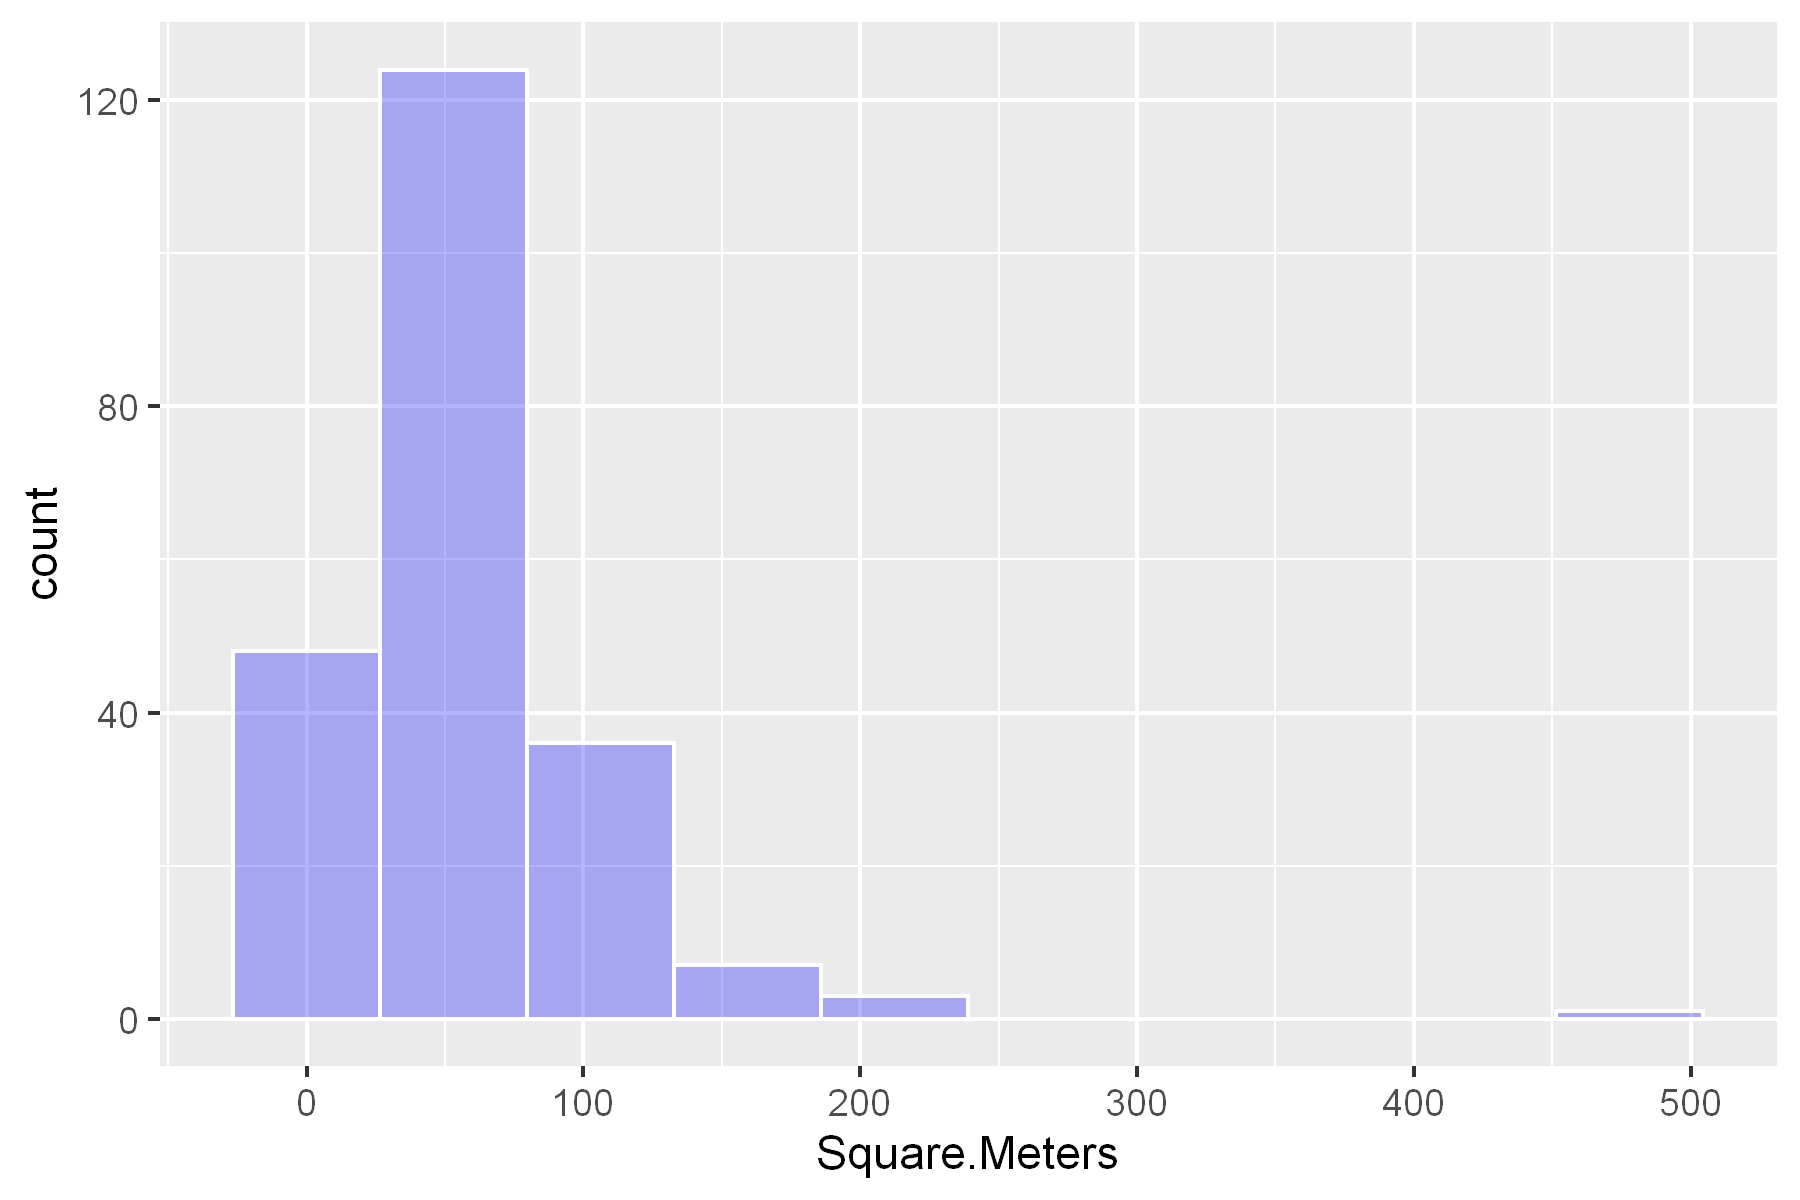

In [284]:
ggplot(data = df_madrid,
      aes(Square.Meters)) + 
        geom_histogram( bins = 10,
                       col = 'white',
                       fill = 'blue',
                       alpha = 0.3
        )

Vemos que existen algunos pisos con unos 450 m2 o más, casi ninguno entre 250-450. Pienso que se debe de tratar de un error, así que es mejor asignar un NA a aquellos de más de, pongamos, 300 m2.

In [285]:
df_madrid$Square.Meters <- replace(df_madrid$Square.Meters, df_madrid$Square.Meters > 300, NA)

Warning message:
"Removed 5383 rows containing non-finite values (stat_bin)."

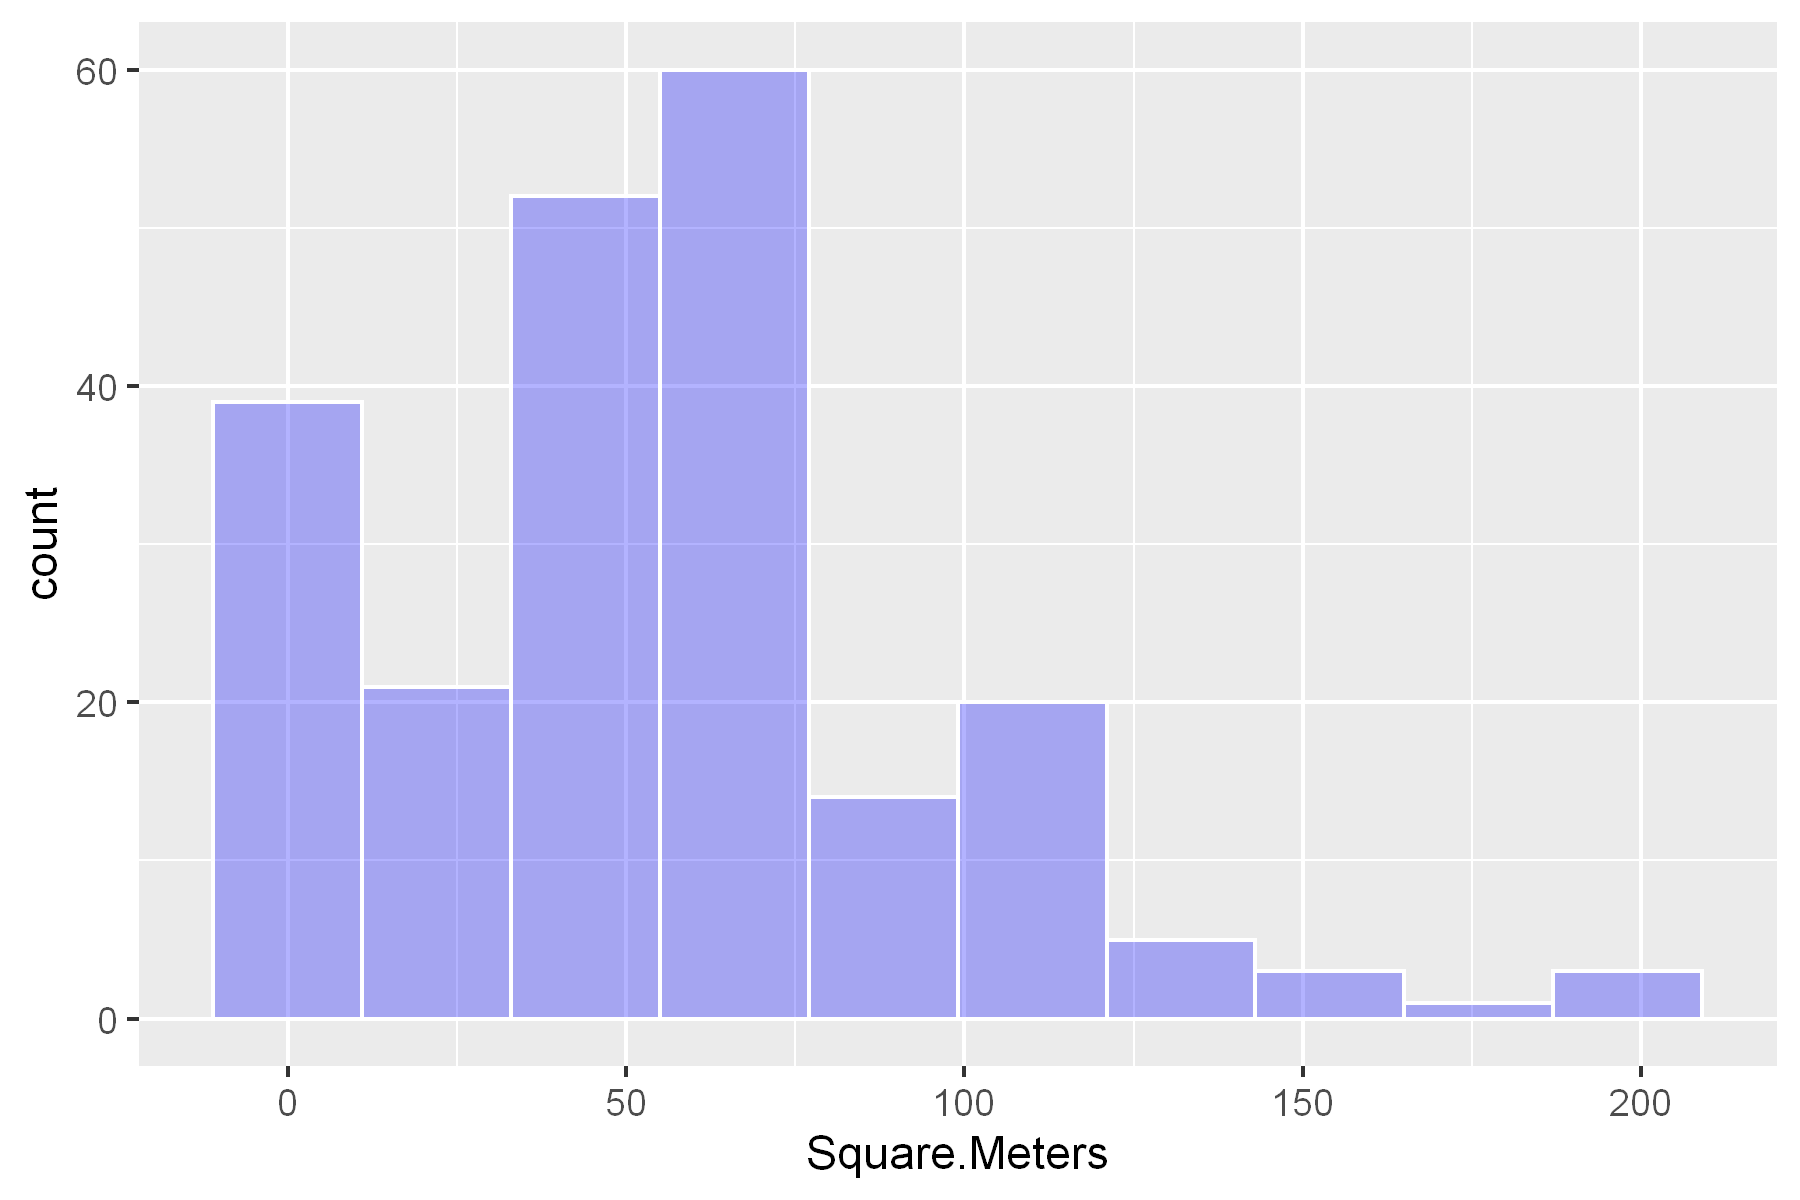

In [286]:
ggplot(data = df_madrid,
      aes(Square.Meters)) + 
        geom_histogram( bins = 10,
                       col = 'white',
                       fill = 'blue',
                       alpha = 0.3
        )

P9 - Asigna el valor NA a la columna Square.Meters de los apartamentos que tengan menos de 20 m^2

R9 - Lo hacemos de nuevo con la función replace()

In [287]:
df_madrid$Square.Meters <- replace(df_madrid$Square.Meters, df_madrid$Square.Meters < 20, NA)

P10 - Existen varios Barrios que todas sus entradas son NA, vamos a eliminar del dataset todos los pisos que pertenecen a estos barrios.

R10 - Esto es algo más complicado. Lo que hacemos es iterar entre los barrios, comprobando si e número de NAs es igual al número de filas para cada barrio. En ese caso procedemos a eliminar esas filas, y por lo tanto también el barrio.

In [290]:
for (barrio in unique(df_madrid$Neighbourhood)) {
    df_aux <- df_madrid[df_madrid$Neighbourhood == barrio, ]
    
    if (nrow(df_aux) == sum(sapply(df_aux$Square.Meters, function(x) sum(is.na(x))))) {
        
        df_madrid <- df_madrid[!(df_madrid$Neighbourhood == barrio), ]
        
    }
    
}

In [291]:
dim(df_madrid)

[1] 4901   13

Vemos que nos quedan 38 barrios.

In [292]:
r = list(unique(df_madrid$Neighbourhood))

In [293]:
length(unlist(r))

[1] 38

El barrio parece ser un indicador importante para los metros cuadrados de un apartamento.

Vamos a agrupar los barrios por metros cuadrados. Podemos usar una matriz de similaridad de Tukey tal y como hicimos en el curso de estadística:

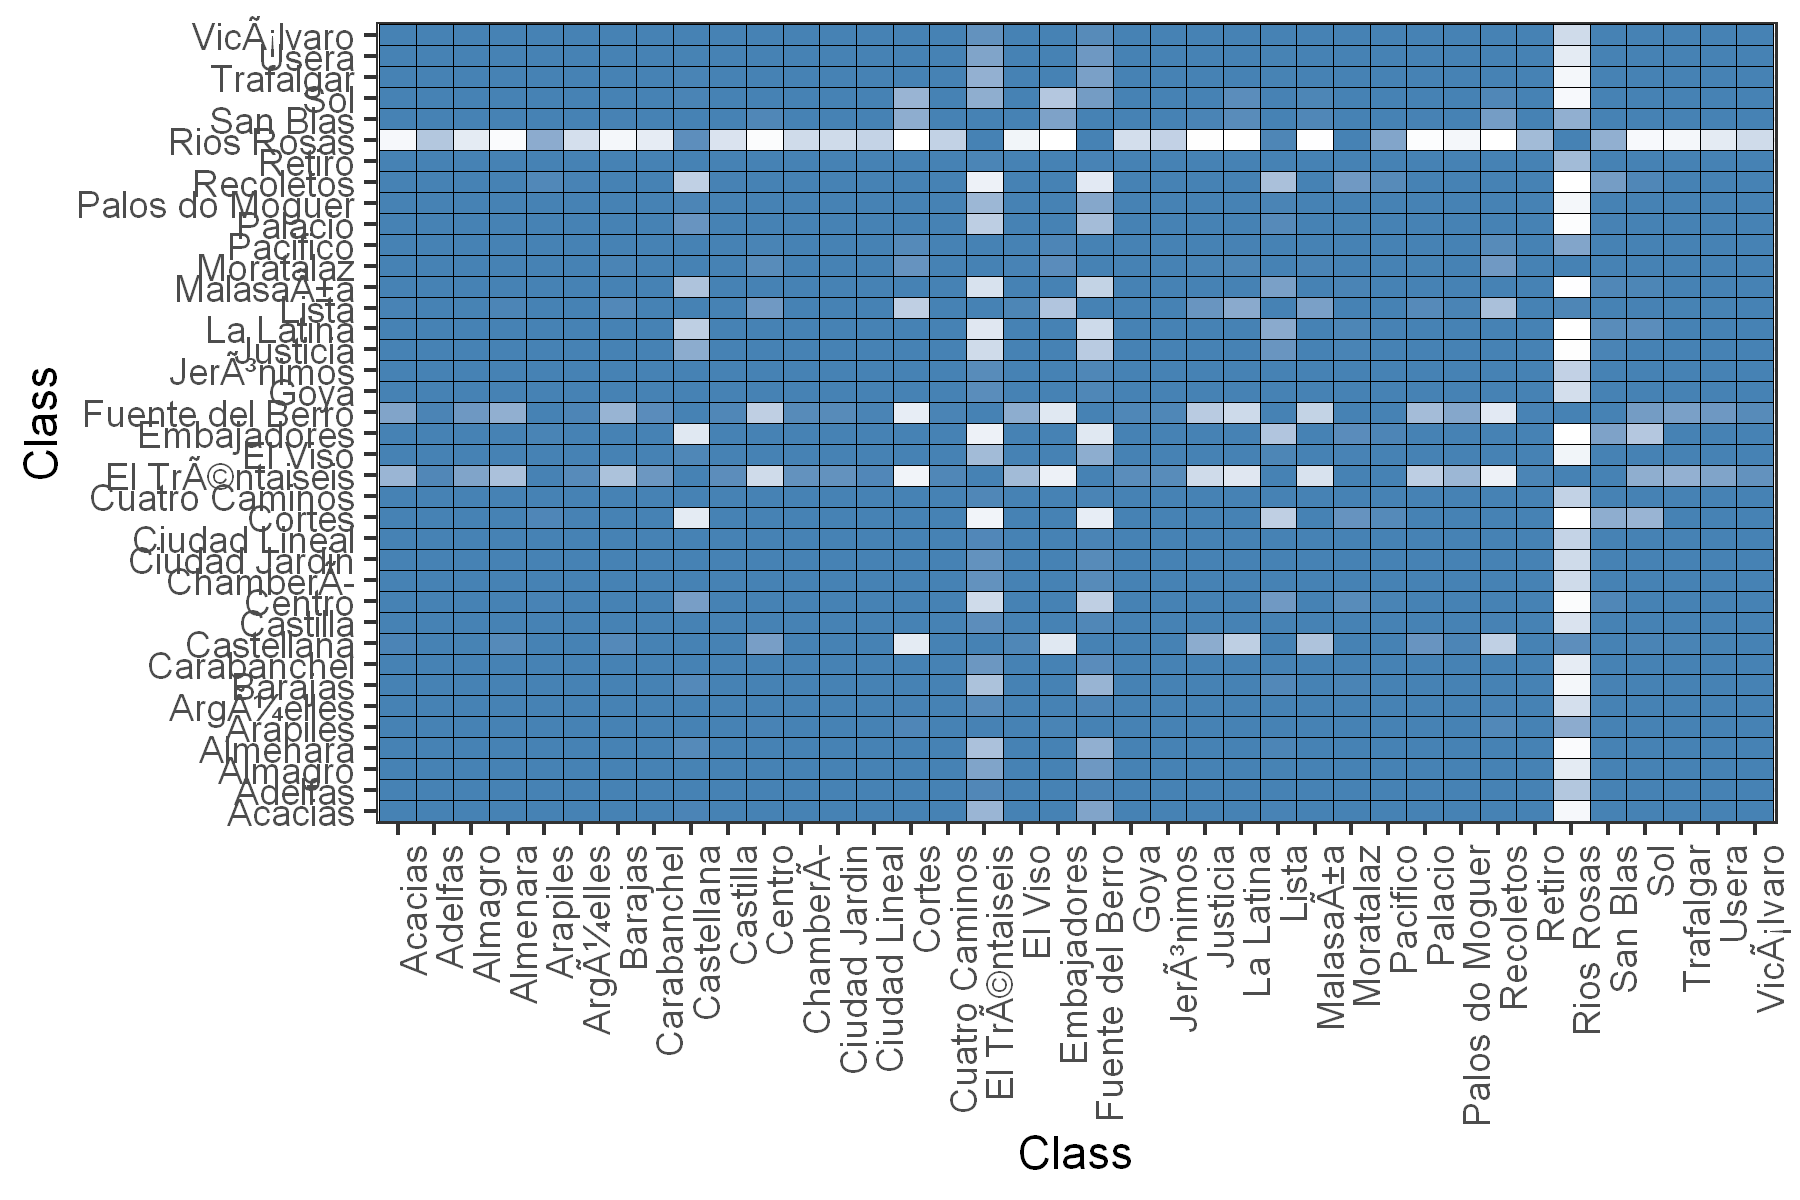

In [294]:
tky<-TukeyHSD(aov( formula=Square.Meters~Neighbourhood, data=df_madrid ))
tky.result<-data.frame(tky$Neighbourhood)
cn <-sort(unique(df_madrid$Neighbourhood))
resm <- matrix(NA, length(cn),length(cn))
rownames(resm) <- cn
colnames(resm) <- cn
resm[lower.tri(resm) ] <- round(tky.result$p.adj,4)
resm[upper.tri(resm) ] <- t(resm)[upper.tri(resm)] 
diag(resm) <- 1
library(ggplot2)
library(reshape2)
dfResm <- melt(resm)
ggplot(dfResm, aes(x=Var1, y=Var2, fill=value))+
  geom_tile(colour = "black")+
  scale_fill_gradient(low = "white",high = "steelblue")+
  ylab("Class")+xlab("Class")+theme_bw()+
  theme(axis.text.x = element_text(angle = 90, hjust = 1),legend.position="none")

P11 - Usando como variable de distancia: 1-resm
Dibuja un dendrograma de los diferentes barrios.


R11 - Vamos a ello, pero primero conviene analizar el gráfico anterior. Se ve que hay un barrio muy distinto al resto, y que solo parece tener cierto parecido con Moratalaz y Lista. El resto, al menos aparentemente, se parecen bastante entre sí.

In [295]:
library(caret)

In [296]:
library(dendextend)

Definimos la matriz de distancias con as.dist().Echamos un vistazo, y encontramos muchos ceros; desde mi inexperiencia eso puede no ser demasiado bueno.

In [297]:
dfResm.dist <- as.dist(1-resm)

In [298]:
dfResm.dist

                 Acacias Adelfas Almagro Almenara Arapiles ArgÃ¼elles Barajas
Adelfas           0.0000                                                     
Almagro           0.0000  0.0000                                             
Almenara          0.0000  0.0000  0.0000                                     
Arapiles          0.0000  0.0000  0.0000   0.0000                            
ArgÃ¼elles        0.0000  0.0000  0.0000   0.0000   0.0000                   
Barajas           0.0000  0.0000  0.0000   0.0000   0.0003     0.0000        
Carabanchel       0.0000  0.0000  0.0000   0.0000   0.0000     0.0000  0.0000
Castellana        0.0211  0.0000  0.0052   0.0668   0.0000     0.0000  0.0628
Castilla          0.0000  0.0000  0.0000   0.0000   0.0000     0.0000  0.0000
Centro            0.0000  0.0000  0.0000   0.0000   0.0078     0.0006  0.0000
ChamberÃ­         0.0000  0.0000  0.0000   0.0000   0.0000     0.0000  0.0000
Ciudad Jardin     0.0000  0.0000  0.0000   0.0000   0.0000     0

Completamos el proceso de hacer el dendrograma de forma habitual y lo dibujamos.

In [299]:
dfResm.tree <- hclust(dfResm.dist, method = 'complete')

In [300]:
dfResm.dend <- as.dendrogram(dfResm.tree)

Lo cierto es que obtenemos un dendrograma bastante limpio, con tres clusteres bien diferenciados, y un cuarto que aparece solo muy al final. 

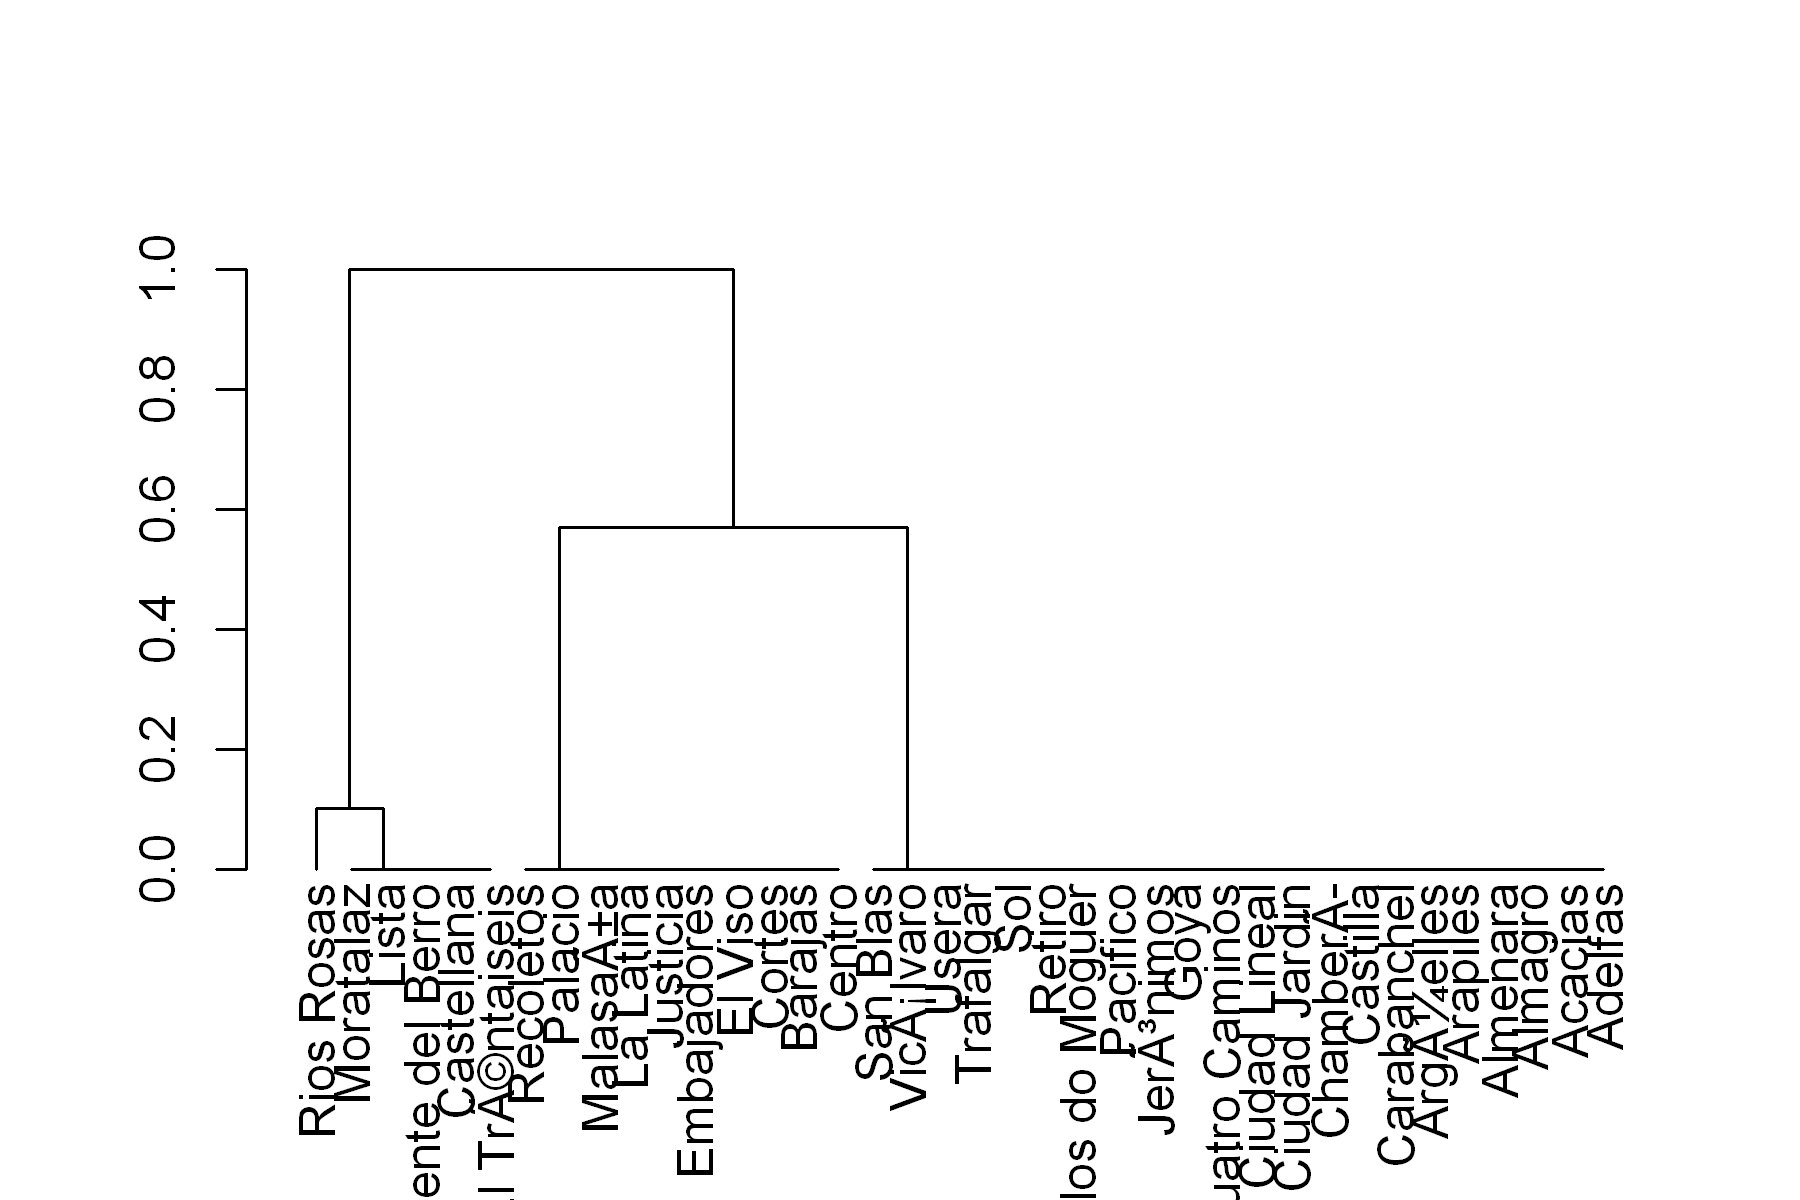

In [317]:
plot(dfResm.dend)

P12 - ¿Que punto de corte sería el aconsejable?, ¿cuantos clusters aparecen?

R12 - Pienso que lo aconsejable es tomar los 3 clusteres principales...

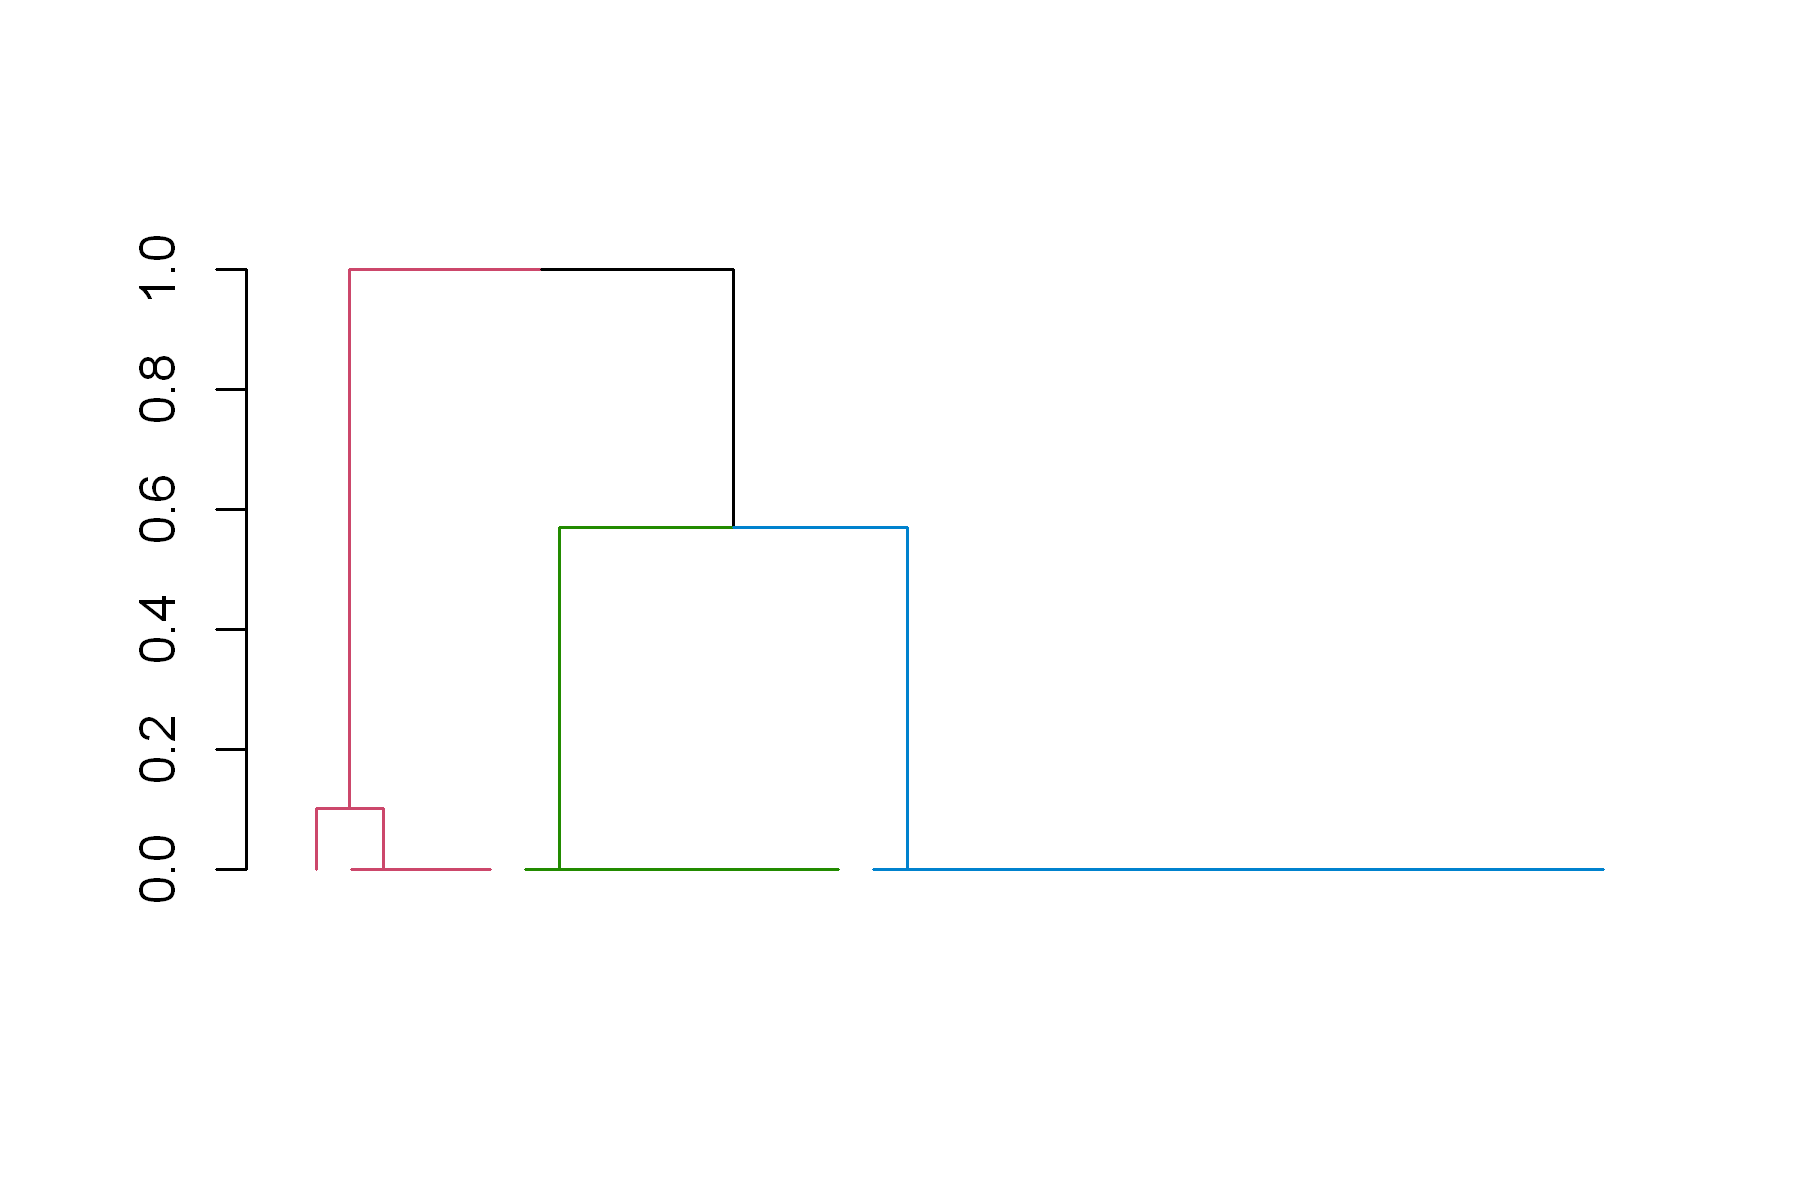

In [302]:
plot(color_branches(dfResm.dend, k = 3), leaflab = 'none')

P13 - Vamos a crear una nueva columna en el dataframe df_madrid con un nuevo identificador marcado por los clusters obtenidos. Esta columna la llamaremos neighb_id

R13 - Primero hacemos el corte con k=3 mediante cutree()

In [303]:
cl <- cutree(dfResm.tree, k = 3)

In [304]:
cl

Acacias          Adelfas          Almagro         Almenara 
               1                1                1                1 
        Arapiles       ArgÃ¼elles          Barajas      Carabanchel 
               1                1                2                1 
      Castellana         Castilla           Centro        ChamberÃ­ 
               3                1                2                1 
   Ciudad Jardin    Ciudad Lineal           Cortes   Cuatro Caminos 
               1                1                2                1 
 El TrÃ©ntaiseis          El Viso      Embajadores Fuente del Berro 
               3                2                2                3 
            Goya       JerÃ³nimos         Justicia        La Latina 
               1                1                2                2 
           Lista        MalasaÃ±a        Moratalaz         Pacifico 
               3                2                3                1 
         Palacio  Palos do Moguer        Recoletos           Retiro 
               2                1                2                1 
      Rios Rosas         San Blas              Sol        Trafalgar 
               3                1                1                1 
           Usera       VicÃ¡lvaro 
               1                1

En las celdas siguientes trasformamos el objeto cutree en un dataframe, al que vamos cambiando el nombre de las columnas para, a continuación, hacer un merge con df_madrid. He de reconocer que he tenido en cuenta lo publicado en slack, aunque he simplificado alguna cosa.

In [305]:
df_clusters <- as.data.frame(cl)

In [307]:
df_clusters

,cl
Acacias,1
Adelfas,1
Almagro,1
Almenara,1
Arapiles,1
ArgÃ¼elles,1
Barajas,2
Carabanchel,1
Castellana,3
Castilla,1


In [308]:
df_clusters <- cbind(Neighbourhood = rownames(df_clusters), df_clusters)

In [309]:
df_clusters

,Neighbourhood,cl
Acacias,Acacias,1
Adelfas,Adelfas,1
Almagro,Almagro,1
Almenara,Almenara,1
Arapiles,Arapiles,1
ArgÃ¼elles,ArgÃ¼elles,1
Barajas,Barajas,2
Carabanchel,Carabanchel,1
Castellana,Castellana,3
Castilla,Castilla,1


In [310]:
rownames(df_clusters) <- NULL
colnames(df_clusters)[2] <- 'neighb_id'

In [311]:
df_clusters

Neighbourhood,neighb_id
Acacias,1
Adelfas,1
Almagro,1
Almenara,1
Arapiles,1
ArgÃ¼elles,1
Barajas,2
Carabanchel,1
Castellana,3
Castilla,1


In [312]:
df_madrid <- merge(df_madrid, df_clusters, by = 'Neighbourhood')

In [313]:
head(df_madrid)

Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters,neighb_id
Acacias,4,1,1,2,60,753,2,12,85,40.40073,-3.706203,69.96,1
Acacias,2,1,1,1,60,NA,1,0,80,40.40030,-3.701024,NA,1
Acacias,2,1,2,1,75,NA,1,0,NA,40.40270,-3.703143,NA,1
Acacias,2,1,1,1,68,NA,1,0,94,40.40452,-3.707737,NA,1
Acacias,2,1,1,1,35,NA,1,0,96,40.40057,-3.702002,NA,1
Acacias,2,1,0,1,22,NA,1,5,97,40.40504,-3.705093,NA,1


In [314]:
summary(df_madrid)

     Neighbourhood   Accommodates      Bathrooms        Bedrooms    
 MalasaÃ±a  : 679   Min.   : 1.000   Min.   :0.000   Min.   : 0.00  
 Embajadores: 585   1st Qu.: 3.000   1st Qu.:1.000   1st Qu.: 1.00  
 La Latina  : 571   Median : 4.000   Median :1.000   Median : 1.00  
 Sol        : 536   Mean   : 4.091   Mean   :1.244   Mean   : 1.42  
 Cortes     : 441   3rd Qu.: 5.000   3rd Qu.:1.000   3rd Qu.: 2.00  
 Justicia   : 384   Max.   :16.000   Max.   :6.000   Max.   :10.00  
 (Other)    :1705                    NA's   :14      NA's   :7      
      Beds            Price         Square.Feet     Guests.Included 
 Min.   : 1.000   Min.   : 18.00   Min.   :   0.0   Min.   : 1.000  
 1st Qu.: 1.000   1st Qu.: 59.00   1st Qu.:   0.0   1st Qu.: 1.000  
 Median : 2.000   Median : 75.00   Median : 323.0   Median : 2.000  
 Mean   : 2.366   Mean   : 90.39   Mean   : 406.7   Mean   : 1.954  
 3rd Qu.: 3.000   3rd Qu.:100.00   3rd Qu.: 646.0   3rd Qu.: 2.000  
 Max.   :16.000   Max.   :800.00  

Comprobamos que debemos transformar la columna del cluster en factor. Del tercer cluster hay pocos elementos, y la primera tentación sería librarse de esas filas, o elegir solo dos clusters, pero es que, al ser tan diferente pienso que eliminariamos demasiada información.

In [315]:
df_madrid$neighb_id <- as.factor(df_madrid$neighb_id)

In [316]:
summary(df_madrid)

     Neighbourhood   Accommodates      Bathrooms        Bedrooms    
 MalasaÃ±a  : 679   Min.   : 1.000   Min.   :0.000   Min.   : 0.00  
 Embajadores: 585   1st Qu.: 3.000   1st Qu.:1.000   1st Qu.: 1.00  
 La Latina  : 571   Median : 4.000   Median :1.000   Median : 1.00  
 Sol        : 536   Mean   : 4.091   Mean   :1.244   Mean   : 1.42  
 Cortes     : 441   3rd Qu.: 5.000   3rd Qu.:1.000   3rd Qu.: 2.00  
 Justicia   : 384   Max.   :16.000   Max.   :6.000   Max.   :10.00  
 (Other)    :1705                    NA's   :14      NA's   :7      
      Beds            Price         Square.Feet     Guests.Included 
 Min.   : 1.000   Min.   : 18.00   Min.   :   0.0   Min.   : 1.000  
 1st Qu.: 1.000   1st Qu.: 59.00   1st Qu.:   0.0   1st Qu.: 1.000  
 Median : 2.000   Median : 75.00   Median : 323.0   Median : 2.000  
 Mean   : 2.366   Mean   : 90.39   Mean   : 406.7   Mean   : 1.954  
 3rd Qu.: 3.000   3rd Qu.:100.00   3rd Qu.: 646.0   3rd Qu.: 2.000  
 Max.   :16.000   Max.   :800.00  

P14 - Vamos a crear dos grupos, uno test y otro train.

Tratamos de predecir los metros cuadrados en función del resto de columnas del dataframe.

R14 - Procedemos de forma habitual para hacer la separación de train y test.

In [318]:
idx <- sample(1:nrow(df_madrid), nrow(df_madrid) * 0.7 )

In [319]:
df_madrid.train <- df_madrid[idx, ]

In [320]:
df_madrid.test <- df_madrid[-idx, ]

In [321]:
dim(df_madrid.train)

[1] 3430   14

In [322]:
dim(df_madrid.test)

[1] 1471   14

Procedemos a hacer un modelo con casi todas las variables. Hemos suprimido la de square.Feet al ser de facto la misma que estamos estimando. Hemos mantenido las filas con NA, aunque en realidad no debería importar en demasía pues donde más hay es precisamente en la columna que estamos intentando estimar.

In [325]:
model_Squaremeters <- lm(formula = Square.Meters ~ Accommodates + Bedrooms + Price + Guests.Included
                         + Extra.People + neighb_id + Latitude + Longitude,
                        data = df_madrid.train)

In [326]:
summary(model_Squaremeters)


Call:
lm(formula = Square.Meters ~ Accommodates + Bedrooms + Price + 
    Guests.Included + Extra.People + neighb_id + Latitude + Longitude, 
    data = df_madrid.train)

Residuals:
    Min      1Q  Median      3Q     Max 
-41.545 -13.008  -1.529   9.328  74.801 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -6.698e+03  5.418e+03  -1.236  0.21909    
Accommodates     1.358e+00  1.685e+00   0.806  0.42229    
Bedrooms         1.875e+01  3.190e+00   5.877 4.79e-08 ***
Price            6.322e-02  2.774e-02   2.279  0.02467 *  
Guests.Included -8.917e-01  1.878e+00  -0.475  0.63591    
Extra.People     6.153e-01  2.294e-01   2.683  0.00846 ** 
neighb_id2      -1.757e+01  3.866e+00  -4.543 1.46e-05 ***
neighb_id3       2.674e+01  1.285e+01   2.081  0.03984 *  
Latitude         1.547e+02  1.288e+02   1.200  0.23263    
Longitude       -1.292e+02  1.105e+02  -1.170  0.24475    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Res

No parece que hayamos obtenido un gran éxito. Debemos eliminar la columna de Accomodates incluso si se menciona en otra de las preguntas. La longitud y latitud también por fortuna; sería una gran molestia en producción tener que rellenar estos datos. Nos quedamos con bedrooms, price y el cluster.

In [ ]:
model_Squaremeters <- lm(formula = Square.Meters ~ Bedrooms + Price + neighb_id ,
                        data = df_madrid.train)

In [330]:
summary(model_Squaremeters)


Call:
lm(formula = Square.Meters ~ Bedrooms + Price + neighb_id, data = df_madrid.train)

Residuals:
    Min      1Q  Median      3Q     Max 
-37.898 -12.123  -3.009   9.371  84.490 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  36.70776    4.59149   7.995 1.29e-12 ***
Bedrooms     21.59521    2.42647   8.900 1.13e-14 ***
Price         0.07054    0.02718   2.595   0.0107 *  
neighb_id2  -16.62424    3.85128  -4.317 3.44e-05 ***
neighb_id3   20.08547   12.37375   1.623   0.1074    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 20.22 on 112 degrees of freedom
  (3313 observations deleted due to missingness)
Multiple R-squared:  0.6453,	Adjusted R-squared:  0.6326 
F-statistic: 50.94 on 4 and 112 DF,  p-value: < 2.2e-16


Ahora obtenemos mejores datos. El R2 no es una maravilla, pero tampoco bastante malo. El único inconveniente es que el p-valor del tercer cluster es algo alto. Quizás podríamos tomar solo dos custers, pero de nuevo, no sé si podemos renunciar a esa información tan a a ligera. Yo, por compromiso preferiría dejarlo.

In [331]:
dim(na.omit(df_madrid.train))

[1] 114  14

In [332]:
dim(na.omit(df_madrid.test))

[1] 50 14

Vamos con testing. Aquí, casi por limpieza, sí que quitamos los NA, a fin de cuentas se centrarían en la variable que queremos estimar. Calculamos nuestra estimación con predict, y la almacenamos en una columna del dataframe test.

In [333]:
df_madrid.test <- na.omit(df_madrid.test)

In [334]:
df_madrid.test$SMest <- predict(model_Squaremeters, df_madrid.test)

In [335]:
head(df_madrid.test)

,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters,neighb_id,SMest
22,Acacias,4,1.0,1,2,60,538,2,15,98,40.40513,-3.707726,49.98,1,62.53515
27,Acacias,4,1.0,1,3,68,807,2,10,90,40.39691,-3.705202,74.97,1,63.09944
46,Adelfas,6,1.5,2,6,60,753,2,15,94,40.39912,-3.670071,69.96,1,84.13037
157,Arapiles,4,1.0,1,2,65,377,1,0,96,40.43335,-3.705369,35.02,1,62.88783
228,ArgÃ¼elles,4,1.5,2,2,95,1044,2,15,89,40.42920,-3.717775,96.99,1,86.59914
487,Castilla,6,2.0,2,4,85,1130,4,10,100,40.47267,-3.675531,104.98,1,85.89377


P15 - Mirad el histograma de los residuos sobre el conjunto de test para evaluar la calidad de vuestro modelo

R15 - Hacemos el histograma, y sale algo bastante razonable, con pinta de distribución normal y media cero.

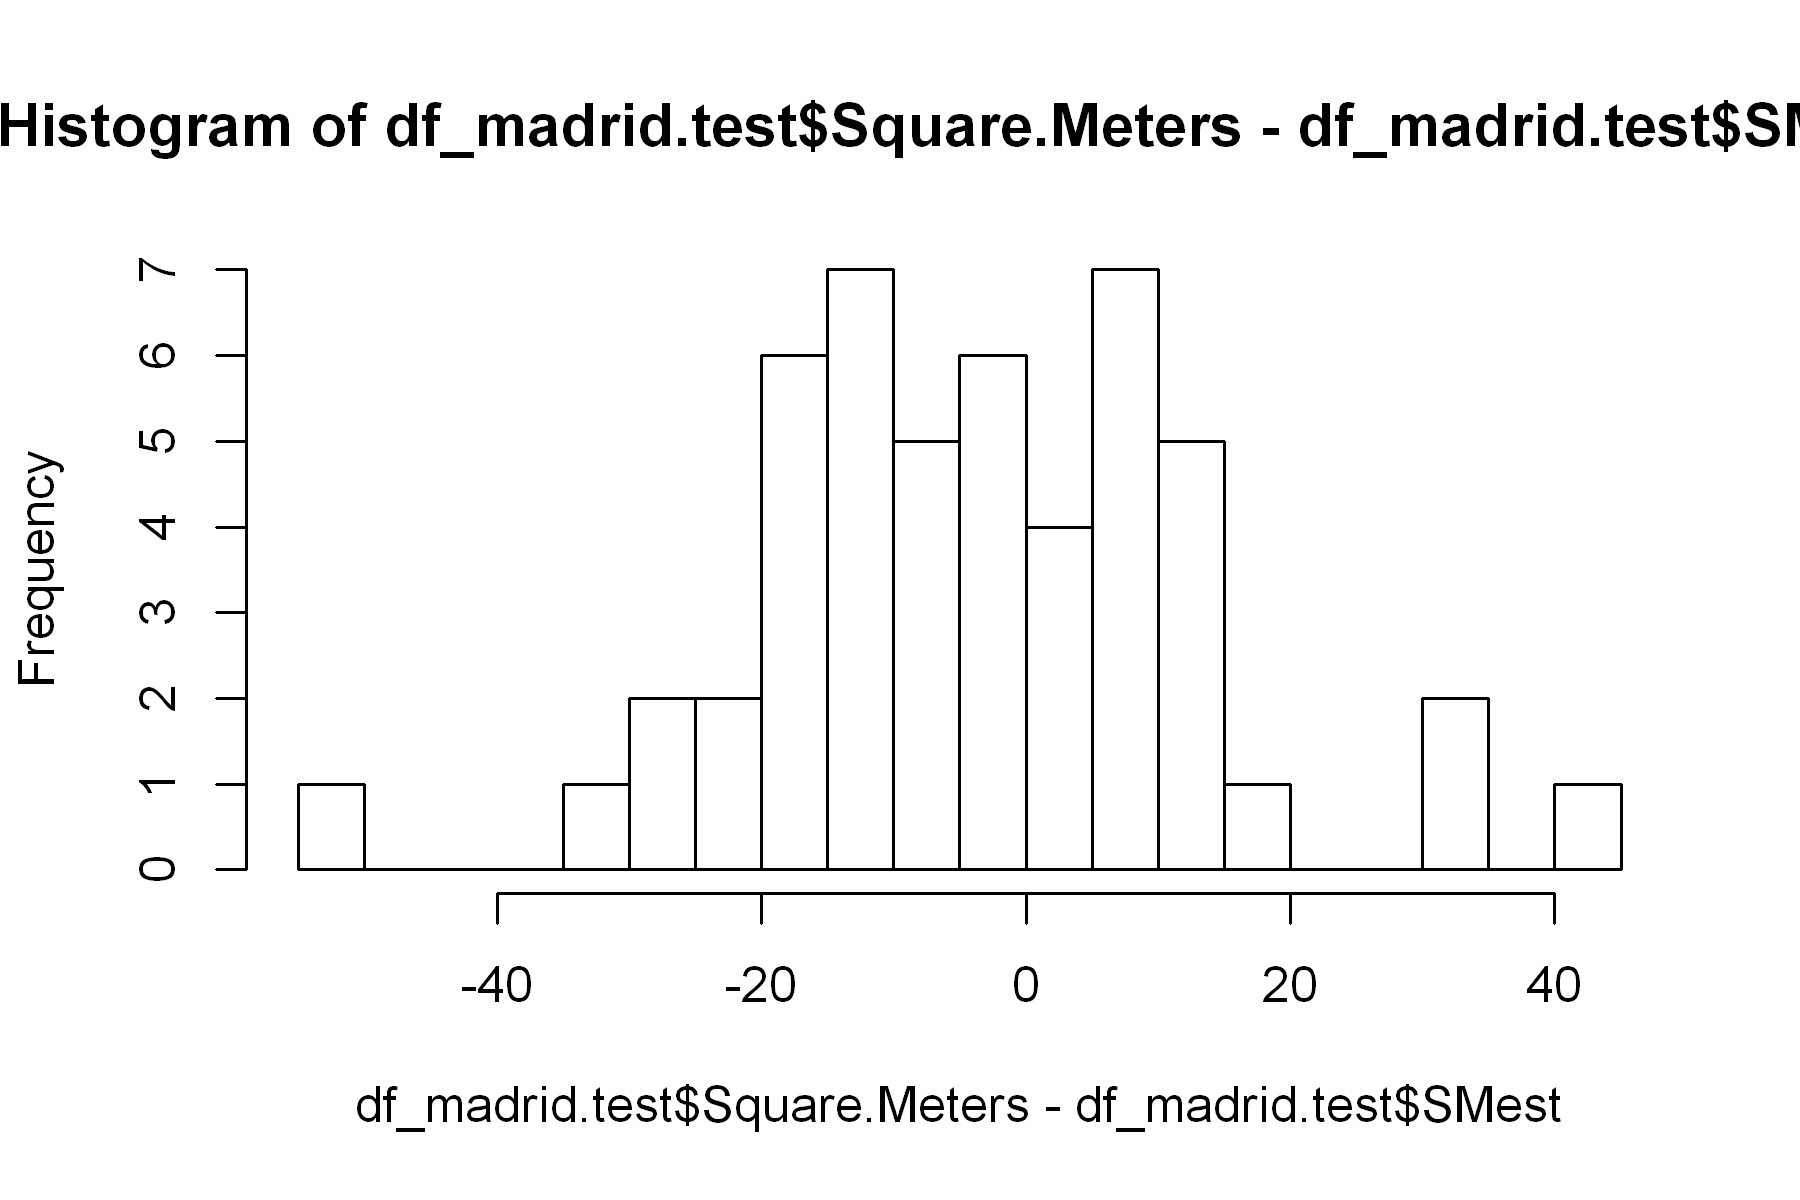

In [336]:
hist(df_madrid.test$Square.Meters - df_madrid.test$SMest, 20)

El qqnorn y el qqline salen también bien.

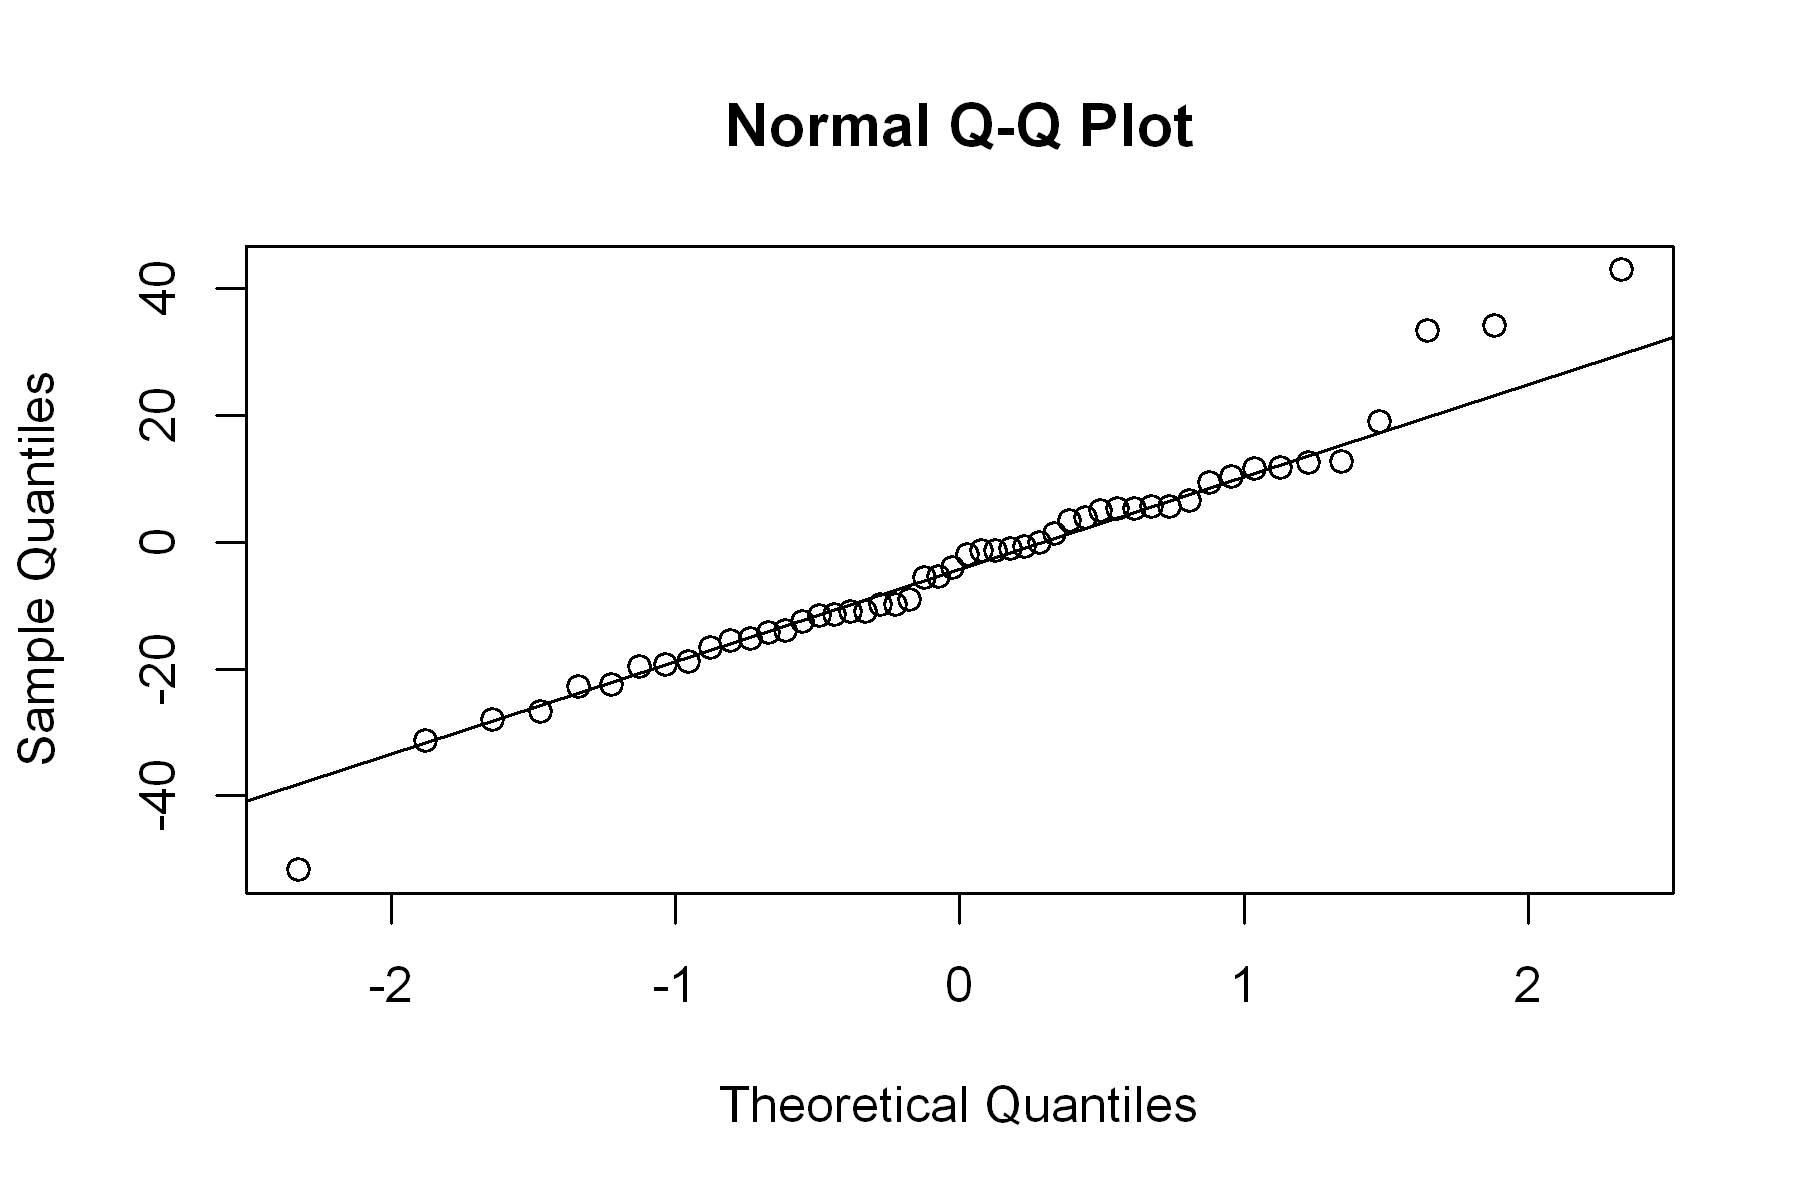

In [337]:
qqnorm(df_madrid.test$Square.Meters - df_madrid.test$SMest)
qqline(df_madrid.test$Square.Meters - df_madrid.test$SMest)

Incluso el test de Shapiro nos sale normal!!

Hay que decir que, probando con samples distintos, a veces salía normal y a veces no, pero cuando no salía tampoco era por mucho.

In [338]:
shapiro.test(df_madrid.test$Square.Meters - df_madrid.test$SMest)


	Shapiro-Wilk normality test

data:  df_madrid.test$Square.Meters - df_madrid.test$SMest
W = 0.97285, p-value = 0.3012


Comprobamos que los resíduos no se diferencian en demasía en función de la variable estimada.

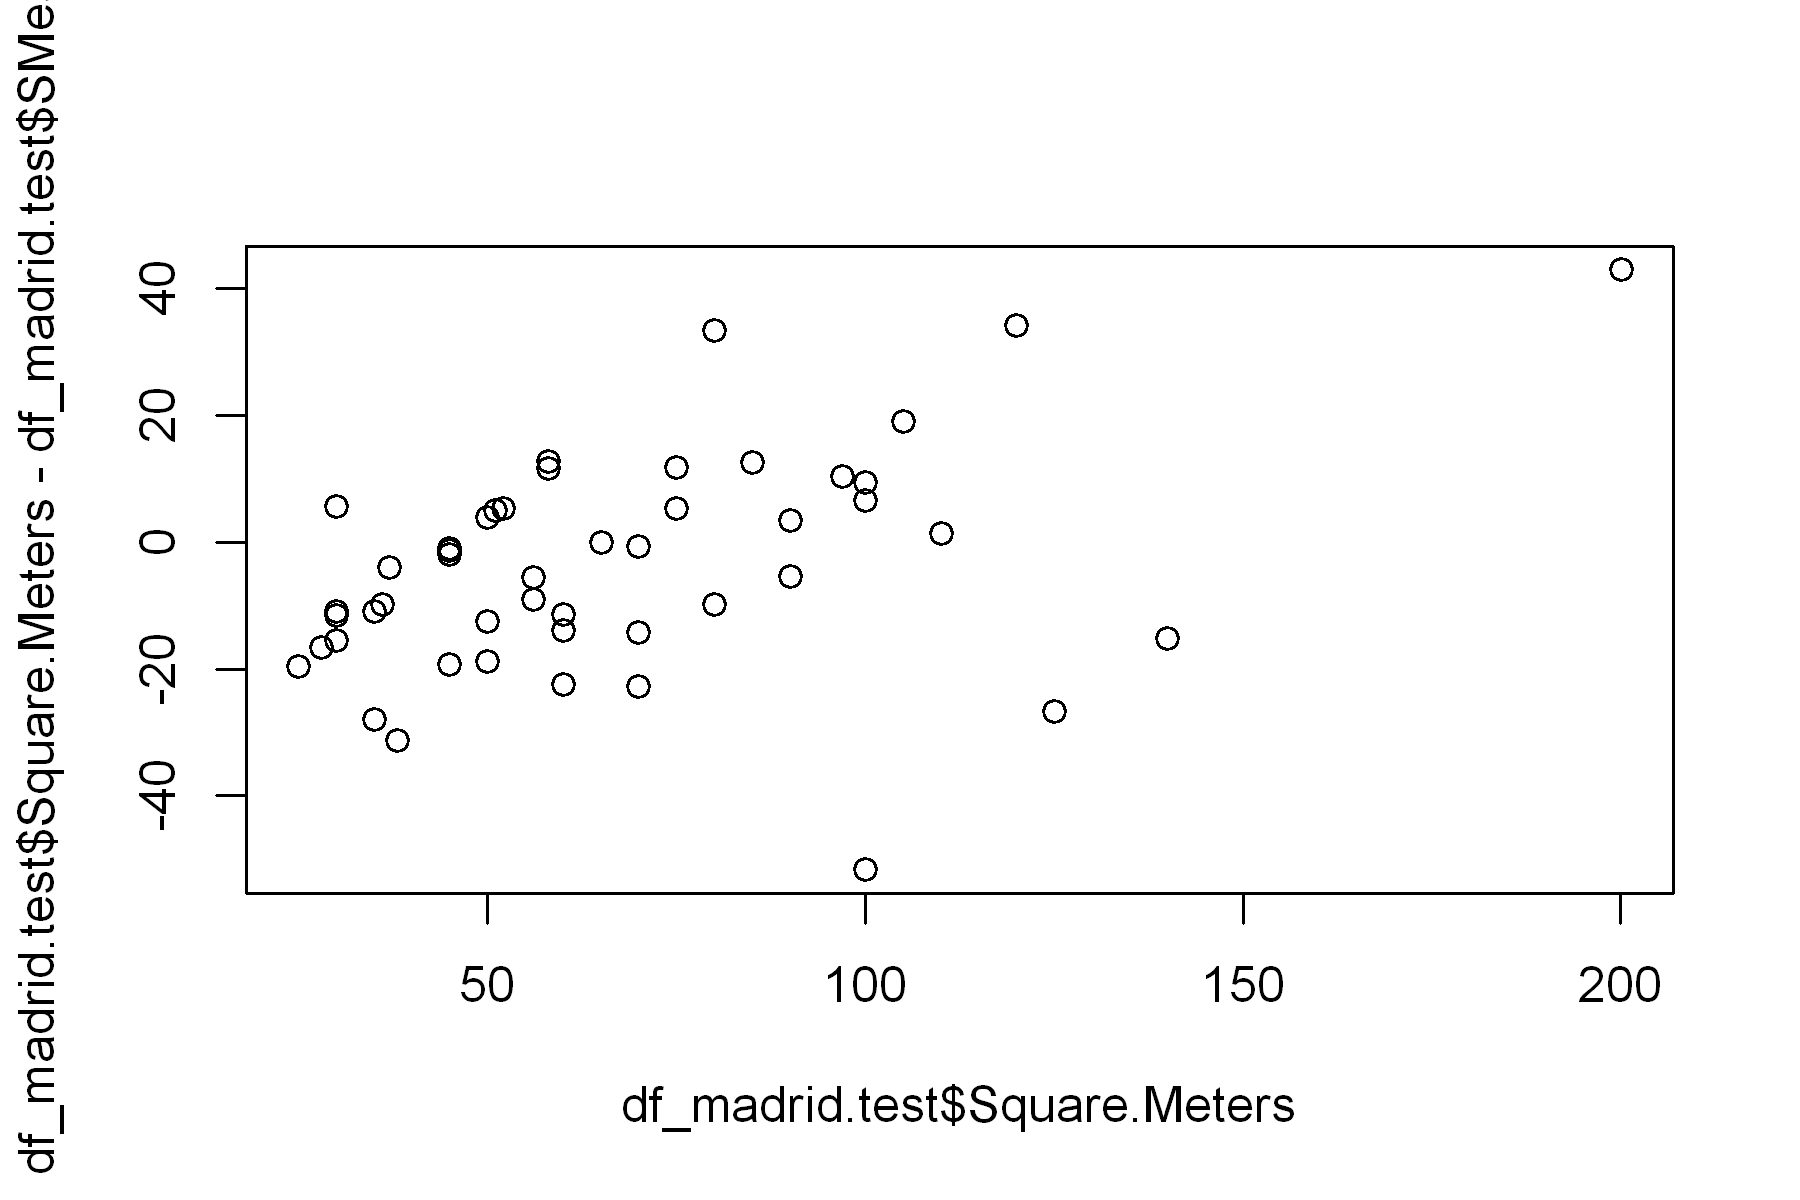

In [339]:
plot(df_madrid.test$Square.Meters, df_madrid.test$Square.Meters - df_madrid.test$SMest)

P16 - Si tuvieramos un anuncio de un apartamento para 6 personas (Accommodates) con un precio de 80€/noche y 3 habitaciones en el barrio de Sol.
¿Cuantos metros cuadrados tendría?
¿Como varía sus metros cuadrados con cada habitación adicional?

R16 - Para ello aplicamos los coeficientes del modelo. Ya no tenemos la variable accomodates, pero sí bedrooms y price. Comprobamos que Sol está dentro del primer cluster, así que no hace falta añadir las correcciones de los otros dos.El resultado son unos 107 m2.

In [351]:
summary(model_Squaremeters)


Call:
lm(formula = Square.Meters ~ Bedrooms + Price + neighb_id, data = df_madrid.train)

Residuals:
    Min      1Q  Median      3Q     Max 
-37.898 -12.123  -3.009   9.371  84.490 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  36.70776    4.59149   7.995 1.29e-12 ***
Bedrooms     21.59521    2.42647   8.900 1.13e-14 ***
Price         0.07054    0.02718   2.595   0.0107 *  
neighb_id2  -16.62424    3.85128  -4.317 3.44e-05 ***
neighb_id3   20.08547   12.37375   1.623   0.1074    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 20.22 on 112 degrees of freedom
  (3313 observations deleted due to missingness)
Multiple R-squared:  0.6453,	Adjusted R-squared:  0.6326 
F-statistic: 50.94 on 4 and 112 DF,  p-value: < 2.2e-16


In [349]:
df_clusters[df_clusters$Neighbourhood == 'Sol', ]

,Neighbourhood,neighb_id
35,Sol,1


In [350]:
price <- model_Squaremeters$coef[1] + 3 * model_Squaremeters$coef[2] + 80 * model_Squaremeters$coef[3]

price

(Intercept) 
   107.1363

P17 - Rellenar los Square.Meters con valor NA con el estimado con el modelo anterior.

R17 - Rellenamos la columna de Square.Meters diferenciando entre las filas que ya tienen el dato, y las que tienen NA; a estas últimas las aplicamos predict() con el modelo.

In [352]:
head(df_madrid)

Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters,neighb_id
Acacias,4,1,1,2,60,753,2,12,85,40.40073,-3.706203,69.96000,1
Acacias,2,1,1,1,60,NA,1,0,80,40.40030,-3.701024,62.53515,1
Acacias,2,1,2,1,75,NA,1,0,NA,40.40270,-3.703143,62.53515,1
Acacias,2,1,1,1,68,NA,1,0,94,40.40452,-3.707737,85.18841,1
Acacias,2,1,1,1,35,NA,1,0,96,40.40057,-3.702002,63.09944,1
Acacias,2,1,0,1,22,NA,1,5,97,40.40504,-3.705093,60.77174,1


In [353]:
df_madrid$Square.Meters[is.na(df_madrid$Square.Meters)] <- predict(model_Squaremeters, df_madrid)

Warning message in df_madrid$Square.Meters[is.na(df_madrid$Square.Meters)] <- predict(model_Squaremeters, :
"número de items para para sustituir no es un múltiplo de la longitud del reemplazo"

In [354]:
head(df_madrid)

Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters,neighb_id
Acacias,4,1,1,2,60,753,2,12,85,40.40073,-3.706203,69.96000,1
Acacias,2,1,1,1,60,NA,1,0,80,40.40030,-3.701024,62.53515,1
Acacias,2,1,2,1,75,NA,1,0,NA,40.40270,-3.703143,62.53515,1
Acacias,2,1,1,1,68,NA,1,0,94,40.40452,-3.707737,85.18841,1
Acacias,2,1,1,1,35,NA,1,0,96,40.40057,-3.702002,63.09944,1
Acacias,2,1,0,1,22,NA,1,5,97,40.40504,-3.705093,60.77174,1


P18 - Usar PCA para encontrar el apartamento más cercano a uno dado.

Este algoritmo nos ayudaría a dado un apartamento que el algoritmo nos devolvería los 5 apartamentos más similares.


Crearemos una función tal que le pasemos un apartamento con los siguientes datos:
* Accommodates	
* Bathrooms	
* Bedrooms	
* Beds	
* Price	
* Guests.Included	
* Extra.People	
* Review.Scores.Rating	
* Latitude	
* Longitude	
* Square.Meters

y nos devuelva los 5 más similares de:

R18 - Bien, en principio tenemos que eliminar las columas no numéricas, algo que hacemos de nuevo con subset().
Almacenamos el resultado en otro dataframe, df_madrid_pca.

In [355]:
df_madrid_pca <- subset(df_madrid, select = -c(Neighbourhood, Square.Feet, neighb_id))

In [356]:
head(df_madrid_pca)

Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters
4,1,1,2,60,2,12,85,40.40073,-3.706203,69.96000
2,1,1,1,60,1,0,80,40.40030,-3.701024,62.53515
2,1,2,1,75,1,0,NA,40.40270,-3.703143,62.53515
2,1,1,1,68,1,0,94,40.40452,-3.707737,85.18841
2,1,1,1,35,1,0,96,40.40057,-3.702002,63.09944
2,1,0,1,22,1,5,97,40.40504,-3.705093,60.77174


Hay una cosa que me molesta algo, y es que no aparezca el index comprobamos que, desde luego, está ahí.

In [357]:
df_madrid_pca[38, ]

,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters
38,6,2,2,3,123,1,0,50,40.40252,-3.669764,63.31105


Comprobamos que tenemos las 11 columnas numéricas.

In [ ]:
df_madrid_pca <- na.omit(df_madrid_pca)

In [359]:
dim(df_madrid_pca)

[1] 4187   11

In [360]:
head(df_madrid_pca)

,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters
1,4,1,1,2,60,2,12,85,40.40073,-3.706203,69.96000
2,2,1,1,1,60,1,0,80,40.40030,-3.701024,62.53515
4,2,1,1,1,68,1,0,94,40.40452,-3.707737,85.18841
5,2,1,1,1,35,1,0,96,40.40057,-3.702002,63.09944
6,2,1,0,1,22,1,5,97,40.40504,-3.705093,60.77174
8,3,1,1,2,45,2,10,100,40.40404,-3.703835,61.47711


Aplicamos por fin prcomp, que estandariza por nosotros. Echamos a continuación un vistazo a los autovalores y autovectores.

In [361]:
pr_comp_madrid <- prcomp(df_madrid_pca, center = TRUE, scale = TRUE)

In [362]:
pr_comp_madrid

Standard deviations (1, .., p=11):
 [1] 2.0196154 1.1882105 1.0252451 1.0063644 0.9786686 0.8183785 0.7673138
 [8] 0.7009726 0.5730894 0.5151486 0.3793868

Rotation (n x k) = (11 x 11):
                            PC1         PC2         PC3         PC4         PC5
Accommodates         0.44713135 -0.05868892  0.07980053 -0.08273354  0.05410261
Bathrooms            0.38525051  0.06933107  0.12926966  0.18376834 -0.12505293
Bedrooms             0.42667753  0.01424587  0.14001827  0.04578389 -0.02303152
Beds                 0.42801465 -0.03841093  0.12958815 -0.02795466  0.00562394
Price                0.37659132  0.03082379  0.10675326  0.19439034 -0.10855900
Guests.Included      0.33589850 -0.09021399 -0.28097863 -0.26036721  0.09087922
Extra.People         0.16225169 -0.12218974 -0.70380844 -0.39969928  0.20119464
Review.Scores.Rating 0.03722685 -0.09473312 -0.56698024  0.66292530 -0.41662173
Latitude             0.02035022  0.68446471 -0.09596442 -0.09109495 -0.04812501
Longitude     

In [363]:
summary(pr_comp_madrid)

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     2.0196 1.1882 1.02525 1.00636 0.97867 0.81838 0.76731
Proportion of Variance 0.3708 0.1283 0.09556 0.09207 0.08707 0.06089 0.05352
Cumulative Proportion  0.3708 0.4991 0.59471 0.68678 0.77385 0.83474 0.88826
                           PC8     PC9    PC10    PC11
Standard deviation     0.70097 0.57309 0.51515 0.37939
Proportion of Variance 0.04467 0.02986 0.02413 0.01308
Cumulative Proportion  0.93293 0.96279 0.98692 1.00000

Estos son los autovectores:

In [364]:
pr_comp_madrid$sdev^2

[1] 4.0788464 1.4118443 1.0511275 1.0127694 0.9577922 0.6697434 0.5887704
 [8] 0.4913626 0.3284314 0.2653780 0.1439343

Vemos su peso relativo y acumulado. Lo cierto es que, comparado con los ejemplos de clase, aquí solo destaca de veras el primero, y luego la caída de importancia de ellos es algo más secuencial. Harían pues falta más de la mitad para llegar al 90% de varianza.

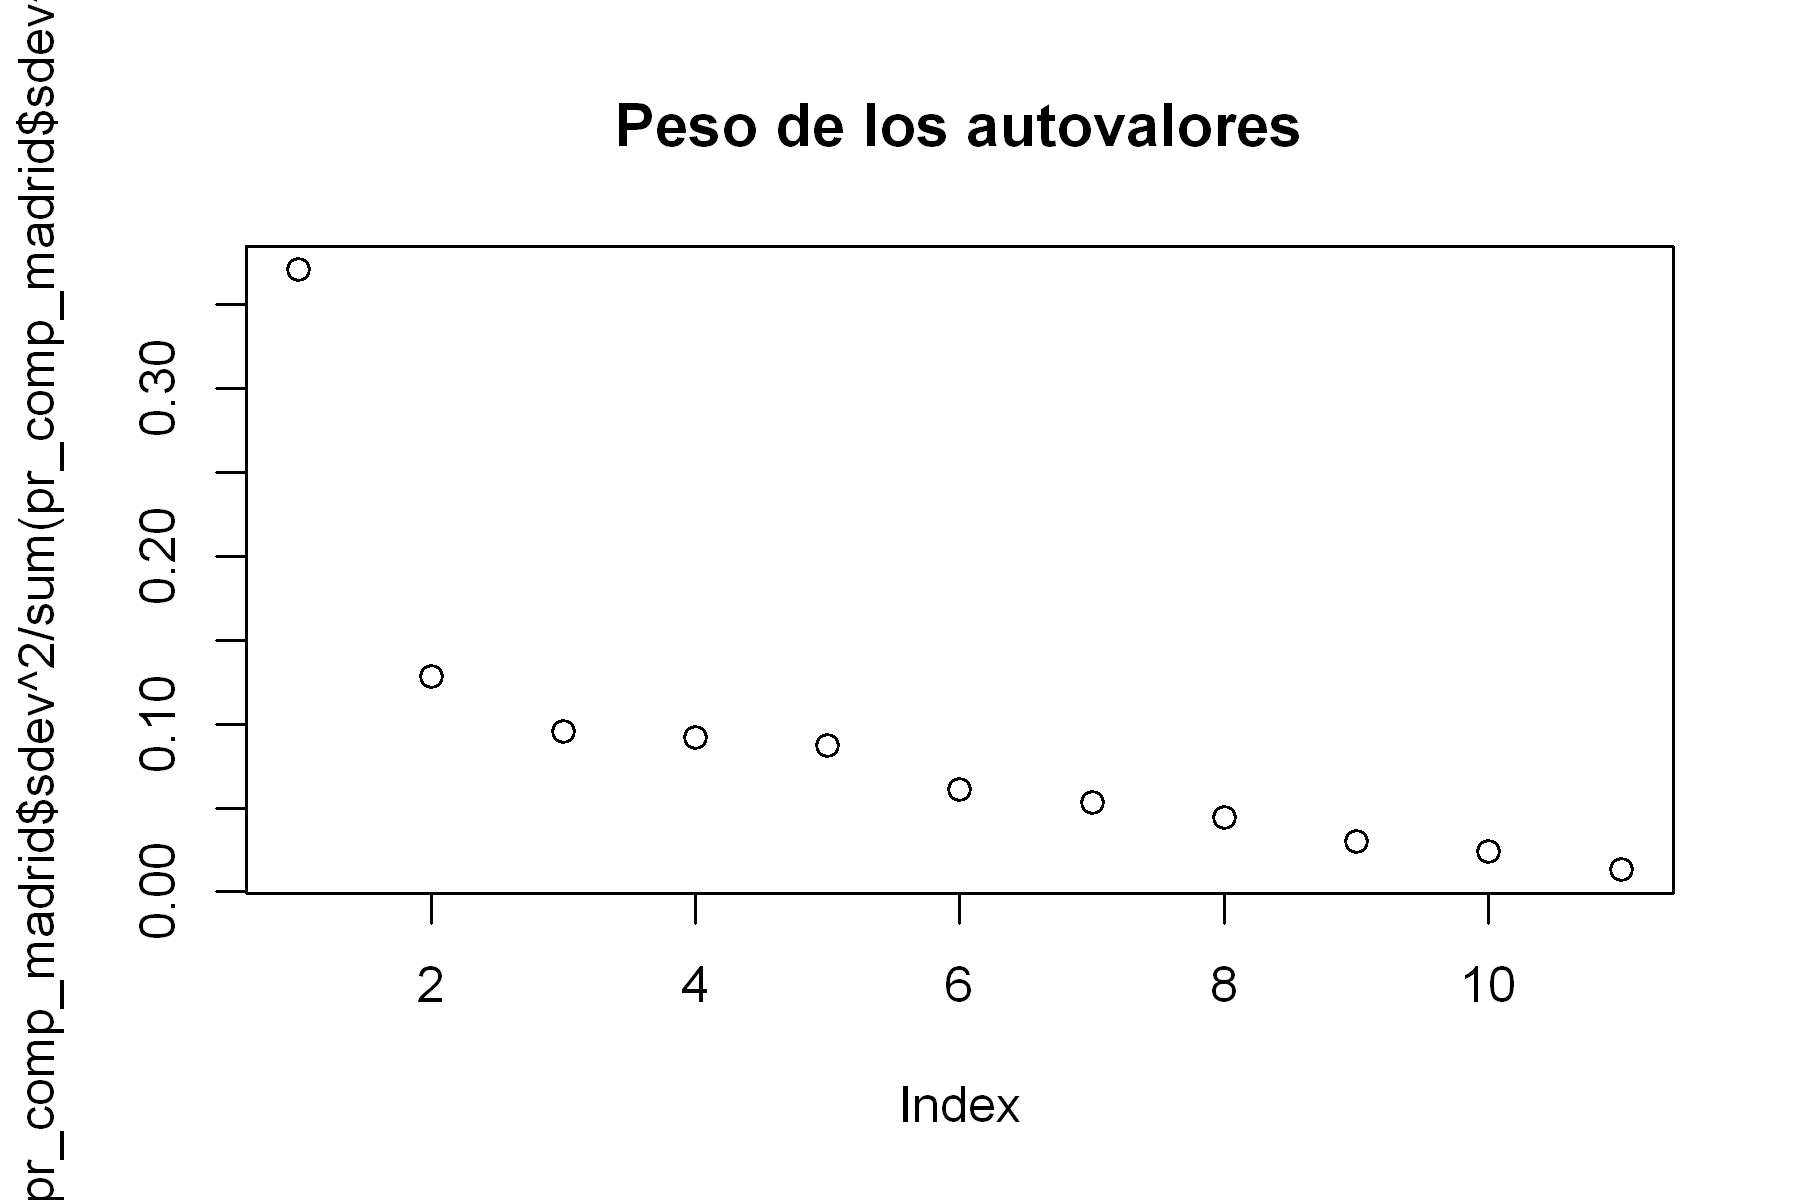

In [365]:
plot(pr_comp_madrid$sdev^2 / sum(pr_comp_madrid$sdev^2), main = 'Peso de los autovalores')

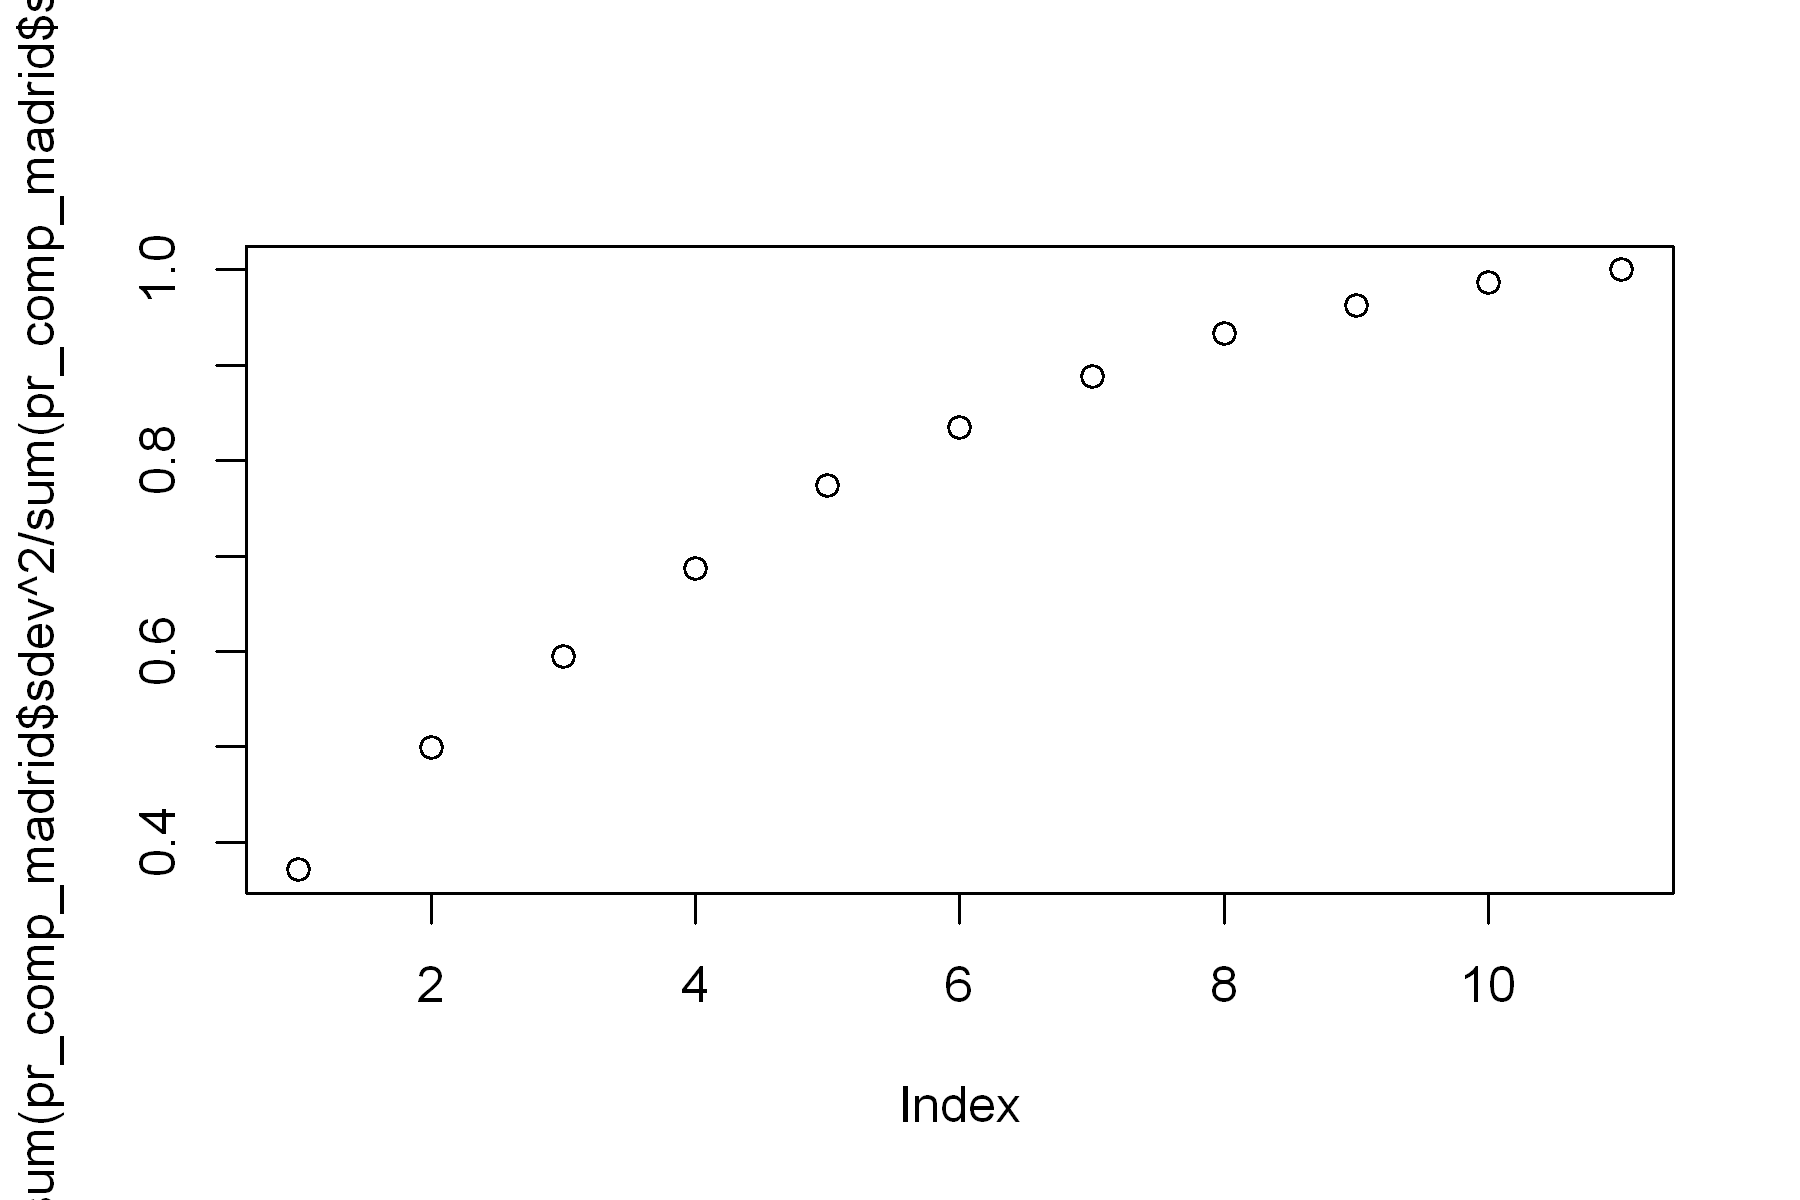

In [366]:
plot(cumsum(pr_comp_madrid$sdev^2 / sum(pr_comp_madrid$sdev^2)))

Aquí están los vectores transformados:

In [367]:
head(pr_comp_madrid$x)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
1,-0.7307361,-1.2651341,0.2264354,-0.4469472,0.8702446,-0.6126979,-0.6310591,0.14980728,0.02020246,-0.1425045,0.12178381
2,-1.9345955,-0.8019386,1.3183273,-0.2906081,0.4450686,-0.4820190,-1.1480347,0.40438944,0.02354253,0.3490637,-0.19468563
4,-1.7910643,-0.7656079,0.3535892,1.2530104,0.5768332,-0.3219665,-0.5774656,0.28088824,0.07361596,0.3251112,-0.16561743
5,-2.0407772,-1.0119164,0.2270510,0.8602717,-0.2389285,-0.8633425,-0.6345001,0.15395017,-0.29933604,0.3462521,-0.12820904
6,-2.5129084,-0.9941869,-0.3159088,0.6243603,-0.1869240,-0.4234219,-0.4203301,0.16234051,-0.49641839,-0.4941319,-0.04452111
8,-1.0359584,-1.1748962,-0.7193104,0.5541116,-0.2076007,-0.8054998,-0.1695221,0.07753995,-0.18025418,-0.0299880,-0.21997538


Y aquí está la matriz de rotación, a la que nos referiremos más adelante:

In [368]:
pr_comp_madrid$rotation

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
Accommodates,0.44713135,-0.05868892,0.07980053,-0.08273354,0.05410261,-0.1647763,0.18886907,-0.19630085,0.023239282,-0.24462415,0.786607463
Bathrooms,0.38525051,0.06933107,0.12926966,0.18376834,-0.12505293,0.2993556,-0.33253936,0.19601773,-0.726755627,-0.11566089,-0.022028187
Bedrooms,0.42667753,0.01424587,0.14001827,0.04578389,-0.02303152,-0.1466796,0.03642547,-0.25497625,-0.008146615,0.83612508,-0.092116758
Beds,0.42801465,-0.03841093,0.12958815,-0.02795466,0.00562394,-0.2247269,0.17466967,-0.38074169,0.055153518,-0.46572647,-0.593129742
Price,0.37659132,0.03082379,0.10675326,0.19439034,-0.10855900,0.4403417,-0.29269801,0.23358821,0.677241814,-0.05768394,-0.011818195
Guests.Included,0.33589850,-0.09021399,-0.28097863,-0.26036721,0.09087922,-0.2025008,0.35509762,0.73270367,-0.014541230,0.05180022,-0.131088756
Extra.People,0.16225169,-0.12218974,-0.70380844,-0.39969928,0.20119464,0.2524450,-0.32128703,-0.30736484,-0.021899250,0.02630318,-0.023675007
Review.Scores.Rating,0.03722685,-0.09473312,-0.56698024,0.66292530,-0.41662173,-0.1193049,0.18421687,-0.07376431,-0.002368798,-0.01787779,0.034549578
Latitude,0.02035022,0.68446471,-0.09596442,-0.09109495,-0.04812501,0.4650632,0.52789834,-0.11932330,-0.040570020,0.01847697,-0.009199580
Longitude,0.04064350,0.64776645,-0.12087991,-0.14831673,-0.26775093,-0.5152473,-0.43355585,0.07491334,0.084383331,-0.05469303,0.035666249


Vamos con la función pedida. La hice en dos pasos, que he preferido mostrar de todas formas. En el primero supongo que tomo todos los autovectores (no incluyo, por facilidad inicial, la variable N de número de PC).

Básicamente lo que hace la función calculo_cercanos es tomar el df de un apartamento, lo transforma mediante predict(), lo transforma a su vez en matriz. A continuación se calcula la lista de distacias aplicando rowSums, y de la que mediante order() hallamos los índices de las menores distancias. Por último, definimos el df respuesta, con los 5 apartamentos de df_madrid_pca más cercanos al dado.

In [369]:
calculo_cercanos <- function (apart){
    
    apart_trans <- predict(pr_comp_madrid, newdata = apart)
    
    apart_trans <- matrix(apart_trans, nrow = 1)
    
    Apc <- pr_comp_madrid$x
    
    distancia <- rowSums((apart_trans[rep(1, times = nrow(Apc)), ] - Apc)^2)
    
    indexes <- order(distancia, decreasing = F)[1:knn]
    
    mas_cercanos <- df_madrid_pca[indexes, ]
    
    
    mas_cercanos
    
}

Para probar que la función funciona le introducimos un vector del dataset, y por definición nos tiene que devolver ese mismo como más parecid, cosa que hace. Los otros cuatro son visiblemente muy similares también.

In [370]:
knn <- 5

apart <- df_madrid_pca[128, ]

In [371]:
apart

,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters
179,2,1,0,1,50,1,0,72,40.43092,-3.708585,41.6453


In [372]:
mas_cercanos_knn <- calculo_cercanos(apart)

In [373]:
mas_cercanos_knn

,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters
179,2,1,0,1,50,1,0,72,40.43092,-3.708585,41.64530
205,2,1,0,1,50,1,0,70,40.43058,-3.707958,40.23457
3407,2,1,0,1,75,1,0,67,40.42902,-3.703978,35.02000
210,2,1,0,1,50,1,0,70,40.43050,-3.709975,62.88783
199,2,1,0,1,50,1,0,80,40.43003,-3.708693,40.23457


Ahora sí que introducimos la variable N. De hecho, al hacerlo me di cuenta que los cambios no eran nada complicados. Comprobamos que funciona igual para N=11, pero más interesante es que con un N bajo, como 3, además del apartamento original, nos da algunos otros que no son ya los mismos que antes, pero sí parecidos, algo que es razonable que ocurra.

In [374]:
calculo_cercanos_comp <- function (apart){
    
    apart_trans <- predict(pr_comp_madrid, newdata = apart)[1, 1:number_pca_comp]
    
    apart_trans <- matrix(apart_trans, nrow = 1)
    
    Apc <- pr_comp_madrid$x[ , 1:number_pca_comp]
    
    distancia <- rowSums((apart_trans[rep(1, times = nrow(Apc)), ] - Apc)^2)
    
    indexes <- order(distancia, decreasing = F)[1:knn]
    
    mas_cercanos_comp <- df_madrid_pca[indexes, ]
    
    
    mas_cercanos_comp
    
}

In [375]:
number_pca_comp <- 3

In [376]:
knn <- 5

apart <- df_madrid_pca[128, ]

In [377]:
apart

,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters
179,2,1,0,1,50,1,0,72,40.43092,-3.708585,41.6453


In [378]:
mas_cercanos_knn <- calculo_cercanos_comp(apart)

In [379]:
mas_cercanos_knn

,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters
179,2,1,0,1,50,1,0,72,40.43092,-3.708585,41.64530
205,2,1,0,1,50,1,0,70,40.43058,-3.707958,40.23457
210,2,1,0,1,50,1,0,70,40.43050,-3.709975,62.88783
3464,2,1,0,1,30,1,0,70,40.42151,-3.704068,46.96895
1978,2,1,1,1,35,1,0,74,40.42800,-3.700422,23.46926


Bonus: ¿de todas las coordenadas PCA cual es la que mejor permite clasificar por id de barrio?

¿Por qué?

Pienso que ya que los barrios no dejan de ser una entidad definida geograficamente, habría que tener en cuenta las columas que también lo son: longitud y latitud. Si vemos la matrix de rotación, se obserba que PC1, si bien recoge como hemos visto una gran información en total, no hace lo propio con estas dos columnas, porque los coeficientes de ellas son muy bajos: 0,02 y 0,04. 

No ocurre lo mismo con el PC2 que tiene unos coeficientes muy grandes, por lo que escogeríamos desde luego éste. Del resto de PC destacan PC6 y PC7, con lo que también serían apropiados, siempre teniendo en cuenta que aportarían menos información que el PC2.

In [225]:
pr_comp_madrid$rotation

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
Accommodates,0.44718129,-0.05778456,0.08095217,-0.08026266,0.056429256,-0.1661519,0.18708455,-0.19622663,0.023991848,-0.24497530,0.786644613
Bathrooms,0.38518880,0.06900705,0.12668488,0.18255403,-0.130282129,0.3015331,-0.33024123,0.19528772,-0.726782741,-0.11700563,-0.022291839
Bedrooms,0.42674282,0.01400344,0.13930866,0.04725680,-0.023838967,-0.1455971,0.03595480,-0.25526509,-0.009230248,0.83627331,-0.091631295
Beds,0.42801661,-0.03740326,0.13014156,-0.02492850,0.008067801,-0.2254541,0.17334129,-0.38128284,0.056617003,-0.46528301,-0.593154542
Price,0.37651422,0.03016656,0.10367192,0.19254194,-0.113884967,0.4424266,-0.28944889,0.23518329,0.677018721,-0.05661650,-0.012001555
Guests.Included,0.33602429,-0.08800219,-0.27749679,-0.26193022,0.096003452,-0.2066838,0.35408839,0.73232508,-0.015778772,0.05154637,-0.131194109
Extra.People,0.16221152,-0.12088035,-0.69763924,-0.40959064,0.204540103,0.2546494,-0.31946673,-0.30684464,-0.021752444,0.02600279,-0.023779276
Review.Scores.Rating,0.03707985,-0.09637765,-0.57627265,0.64409382,-0.432646281,-0.1198690,0.18352809,-0.07500470,-0.002068022,-0.01791528,0.034706556
Latitude,0.01923690,0.68560003,-0.09405708,-0.09124740,-0.044959468,0.4611755,0.53060770,-0.11889536,-0.040318937,0.01804887,-0.008571571
Longitude,0.04014946,0.65047427,-0.11743566,-0.14867989,-0.257896540,-0.5141514,-0.43780341,0.07435303,0.084668102,-0.05398880,0.035049138
